# Исследование продаж компьютерных игр

**Описание проекта:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** - выявление закономерностей, определяющих успешность игры, на основе анализа данных о продаже компьютерных игр за определенный период интернет-магазина.

## Table of Contens

### [1. Изучение общей информации и предобработка данных](#general)

### [2. Исследовательский анализ данных](#research)

####  [2.1. Распределение количества выпущенных игр по годам](#research1)

####  [2.2. Динамика продаж по платформам](#research2)

####  [2.3. Анализ влияния на продажи игр внутри одной платформы отзывов критиков и пользователей](#research4)

####  [2.4. Анализ продаж игр по жанрам](#research5)

### [3. Портрет пользователя для каждого региона](#research7)

### [4. Проверка гипотез](#research8)

#### [4.1. Сравнение средних пользовательских рейтингов платформ XboxeOne и PC](#research9)

#### [4.2. Сравнение средних пользовательских рейтингов жанров Action и Sports](#research10)

### [5. Общие выводы](#research12)

## Изучение файла с данными и общей информации<a id="general"></a>  </div>

In [1]:
# загрузка библиотек:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

*Откроем файл с данными и изучим общую информацию:*

In [2]:
# прочитаем и откроем датасет:
import pandas as pd
data = pd.read_csv('C:/Users/ke620/Downloads/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# посмотрим общую информацию о таблице:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Описание данных:

  - Name — название игры
  
  - Platform — платформа
  
  - Year_of_Release — год выпуска
  
  - Genre — жанр игры
  
  - NA_sales — продажи в Северной Америке (миллионы проданных копий)
  
  - EU_sales — продажи в Европе (миллионы проданных копий)
  
  - JP_sales — продажи в Японии (миллионы проданных копий)
  
  - Other_sales — продажи в других странах (миллионы проданных копий)
  
  - Critic_Score — оценка критиков (максимум 100)
  
  - User_Score — оценка пользователей (максимум 10)
  
  - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
  

 Данные представлены за период с 1980 г. по 2015 г., за 2016 год данные могут быть неполными.

В стл."Year_of_Release" (год выпуска) требуется замена данных на тип 'int', в стл. "User_Score" (оценка пользователей) требуется замена данных на тип 'float'.

In [4]:
# посмотрим количество пропусков в датасете:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Имеются пропуски в следующих данных: 
  - по 2 пропуска в названии игры, жанре игры;
  - 269 пропусков (доля пропусков составляет 1.6%) в данных по году выпуска игры;
  - 8578 пропусков (доля пропусков - 51.3%) в оценке критиков;
  - 6701 пропуск (доля пропусков - 40.0%) в оценке пользователей;
  - 6766 пропусков (доля пропусков - 40.5%) в рейтинге ESRB.

## Предобработка данных:

### Замена названия столбцов таблицы:

In [5]:
# выведим все названия столбцов таблицы:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# приведем названия столбцов к нижнему регистру:
data.columns = data.columns.str.lower()

# проверим приведение стл.датасета к нижнему регистру:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков:

In [7]:
# посмотрим стр. с пропущенными названиями игр:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В датасете 2 строки, в которых одновременно имеются пропуски в названии игры и в названии жанра игры, а также в других стл.; причина этих пропусков неизвестна, скорее всего связана с отсутствием данных. Заполнить данные пропуски корректно невозможно, поэтому эти строки удалим из датасета.

In [8]:
# удалим 2 строки c пропущенными наименованиями игр, жанра игр: 
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [9]:
# посмотрим количество пропущенных значений в стл."год выпуска" по стл."платформа":
data.query('year_of_release.isna()')['platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [10]:
# теперь посмотрим количество пропущенных значений в стл."год выпуска":
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропусков в стл."год выпуска" - 269 строк, что составляет 1.6% от всех данных по этому стл.

В принципе, количество пропусков в этом стл. невелико и можно было бы удалить эти строки.

Факт наличия пропусков в таких данных, как год выпуска компьютерной игры, необоснован, так как эти данные можно легко восстановить, обратившись к интернету (по названию игры и платформы продвижения игры). Возможно, наличие пропусков в этих данных связано с ошибкой заполнения данных.

Поэтому попробуем заполнить пропущенные значения по стл."год выпуска" по названиям игр. 

Для начала посмотрим пропуски по одной определенной игре.

In [11]:
# посмотрим, например, пропущенные значения по году выпуска у конкретной игры в этом срезе:
data.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
1881,Madden NFL 2004,XB,"2,003.00",Sports,1.02,0.02,0.00,0.05,92.00,8.3,E
3889,Madden NFL 2004,GC,"2,003.00",Sports,0.40,0.10,0.00,0.01,94.00,7.7,E
5708,Madden NFL 2004,GBA,"2,003.00",Sports,0.22,0.08,0.00,0.01,70.00,6.6,E


Выше видим, что год выпуска для конкретной игры "Madden NFL 2004" не указан только для одного вида платформы PS2, но указан для других видов платформ (2003 год). В этом случае пропущенное значение по году выпуска для игры "Madden NFL 2004" на платформе PS2 можно заменить имеющейся в датасете информацией о годе выпуска этой игры на других платформах, т.е. 2003 годом.

In [12]:
# теперь посмотрим количество пропущенных значений в стл."год выпуска" по стл."название игры":
data.query('year_of_release.isna()')['name'].value_counts()

LEGO Harry Potter: Years 5-7    7
Happy Feet Two                  4
Rock Band                       4
Test Drive Unlimited 2          3
Bejeweled 3                     3
                               ..
Jet X20                         1
Tony Hawk's Downhill Jam        1
Tribes: Aerial Assault          1
Big Beach Sports 2              1
Hakuouki: Shinsengumi Kitan     1
Name: name, Length: 232, dtype: int64

В датасете отсутствует информация о годе выпуска 232 игр. Мы уже определили, что информацию о годе выпуска конкретной компьютерной игры можно получить из интернета, но обрабатывать вручную 232 позиции трудоемко.

In [13]:
# посмотрим отдельно информацию по конкретному названию игры, например:
data.query('name == "LEGO Harry Potter: Years 5-7"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.00,0.12,76.00,7.8,E10+
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.00,0.09,77.00,7.9,E10+
2273,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.00,0.15,76.00,8.3,E10+
3081,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.00,0.07,69.00,tbd,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.00,0.03,71.00,6.5,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.00,0.06,NaN,tbd,E10+
7210,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.00,0.03,80.00,8.5,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,"2,012.00",Action,0.07,0.07,0.00,0.03,64.00,6.8,E10+


Из выше представленного среза данных видим информацию об объемах продажи, оценках критиков и пользователей, рейтинге ESRB конкретной игры "LEGO Harry Potter: Years 5-7" на различных платформах. 

По открытым данным в сети "Интернет": год выпуска игры "LEGO Harry Potter: Years 5-7" - ноябрь 2011 г.(для игровых платформ), версия для РС - 2012 г. 
В нашем датасете имеется информация о годе выпуска этой игры для платформы PSV - 2012.
Видим, что некоторые игры на разных платформах выходят неодновременно, с небольшим разрывом.

В общем, пропуски по году выпуска конкретной игры на определенной платформе можно заменить известными имеющимися в датасете данными по году выпуска этой игры по другой платформе: например, у игры "LEGO Harry Potter: Years 5-7" указать год выпуска 2012 (исходя из имеющихся данных в датасете). 

*Попробуем заполнить пропуски по данным года выхода игры на другой платформе:*.

In [14]:
# сделаем срез данных со всеми имеющимися данными по стл.год выпуска и сохраним в переменную data_full_years:
data_full_years = data[~data['year_of_release'].isna()]
data_full_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
data_full_years.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В табл. data_full_years с полными данными по стл."год выпуска" 16444 строки.

In [16]:
# создадим временную переменную temp, в которую включены 
# стл.с наименованием игры, платформы и года выпуска игры из табл.data_full_years:
temp = data_full_years[['name', 'platform', 'year_of_release']]
temp

,name,platform,year_of_release
0,Wii Sports,Wii,"2,006.00"
1,Super Mario Bros.,NES,"1,985.00"
2,Mario Kart Wii,Wii,"2,008.00"
3,Wii Sports Resort,Wii,"2,009.00"
4,Pokemon Red/Pokemon Blue,GB,"1,996.00"
...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00"
16711,LMA Manager 2007,X360,"2,006.00"
16712,Haitaka no Psychedelica,PSV,"2,016.00"
16713,Spirits & Spells,GBA,"2,003.00"


In [17]:
# с помощью цикла переберем стр. табл. с уникальными значения в стл."название игры" и с пропусками в стл."год выпуска"
# в каждой стр. для каждого наименования игры пропуски по стл. "год выпуска" заменим имеющимися данными для этой игры
# для этого возьмем максимальное значение по стл."год выпуска":

for n in data['name'].unique():
    data.loc[(data['name'] == n) & (data['year_of_release'].isna()), 'year_of_release'] = \
    data.loc[(data['name'] == n), 'year_of_release'].max()
    
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [18]:
# проверим заполнение стл. с годом выпуска по нашему примеру (по конкретному названию игры):
data[data['name'] == 'LEGO Harry Potter: Years 5-7']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,"2,012.00",Action,0.69,0.42,0.00,0.12,76.00,7.8,E10+
2132,LEGO Harry Potter: Years 5-7,X360,"2,012.00",Action,0.51,0.37,0.00,0.09,77.00,7.9,E10+
2273,LEGO Harry Potter: Years 5-7,PS3,"2,012.00",Action,0.36,0.41,0.00,0.15,76.00,8.3,E10+
3081,LEGO Harry Potter: Years 5-7,DS,"2,012.00",Action,0.34,0.25,0.00,0.07,69.00,tbd,E10+
4818,LEGO Harry Potter: Years 5-7,3DS,"2,012.00",Action,0.18,0.19,0.00,0.03,71.00,6.5,E10+
6476,LEGO Harry Potter: Years 5-7,PSP,"2,012.00",Action,0.10,0.10,0.00,0.06,NaN,tbd,E10+
7210,LEGO Harry Potter: Years 5-7,PC,"2,012.00",Action,0.05,0.14,0.00,0.03,80.00,8.5,E10+
8059,LEGO Harry Potter: Years 5-7,PSV,"2,012.00",Action,0.07,0.07,0.00,0.03,64.00,6.8,E10+


In [19]:
# посмотрим количество пропусков в табл.data:
data.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [20]:
data_notfull_years = data[data['year_of_release'].isna()]
data_notfull_years
data_notfull_years['name'].value_counts()

Rock Band                          4
Test Drive Unlimited 2             3
Virtua Quest                       2
All-Star Baseball 2005             2
Backbreaker                        2
                                  ..
Tribes: Aerial Assault             1
Jet X20                            1
Flag Capture                       1
Disgaea 3: Absence of Detention    1
Hakuouki: Shinsengumi Kitan        1
Name: name, Length: 133, dtype: int64

Количество пропусков в стл."год выпуска" составляет 146 ед., доля пропусков составляет 0.9%.

В табл. data_notfull_years попали 133 игры, для которых нет данных по стл."год выпуска". 

Пропущенные данные можно заполнить информацией из сети "Интернет", но обработку пропусков вручную считаем нецелесообразной. Правильнее оформить пропуски в стл."год выпуска" как баг-репорт.

Для дальнейшего анализа эти 146 стр. с пропущенными значениями по стл."год выпуска" удалим из нашего датасета.

In [21]:
data.dropna(subset = ['year_of_release'], inplace = True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [23]:
# приводим данные к другому типу:
data['year_of_release'] = data['year_of_release'].astype('int')

Теперь посмотрим пропуски в стл."оценка критиков" и "оценка пользователей":

In [24]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В табл. 6633 пропуска в стл."оценка пользователей" - доля пропусков составляет 40% от всего датасета.

In [25]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В табл. 8492 пропуска в стл."оценка критиков" - доля пропусков составляет 51% от всего датасета.

В описании проекта указано, что оценка критиков составляет максимум 100 б. - возможно в датасете дана оценка игр сайта-агрегатора Metacritic, который собирает отзывы об играх и др.продуктов. На основании собранных отзывов сайт высчитывает средний рейтинг продукта, который активно используется в журналистике, индустрии компьютерных игр и бизнесе, в частности, для предсказания коммерческого успеха недавно выпущенной игры. Рейтинг на Metacritic является взвешенной средней оценкой критиков, строится по различным параметрам. Можно предположить, что такая взвешенная средняя оценка критиков по определенным параметрам будет более объективная, чем оценка пользователей по индивидуальным предпочтениям.

Поэтому предполагаю, что пропуски по оценке критиков определенной игры на одной из платформ, можно заполнить медианным значением оценки критиков этой же игры на другой платформе.

In [26]:
# выведим первые 30 строк табл., отсортированные по наименованию игры:
# data.sort_values(by='name').head(30)

Например, в датасете есть следующее:

- по игре "Frozen: Olaf's Quest" на двух платформах отсутствуют данные по стл."оценка критиков" и "оценка пользователей" - заполнить эти пропуски не представляется возможным;

- по игре "007: Quantum of Solace" имеются данные в стл."оценка критиков" и "оценка пользователей" на различных платформах, за исключением платформы PS2 - заполнить этот пропуск можно, например медианой по конкретной игре. 

Исходя из нашего предположения, в случае наличия пропусков в стл."оценка критиков" по конкретной игре на определенной платформе заполним эти пропуски медианным значением по имеющимся данным по оценке критиков этой игры на других платформах.

In [27]:
# с помощью цикла переберем стр. табл. с уникальными значения в стл."название игры" и с пропусками в стл."оценка критиков"
# в каждой стр. для каждого наименования игры пропуски по стл. "оценка критиков" заменим имеющимися данными для этой игры
# для этого возьмем медианное значение по стл."оценка критиков":

for n in data['name'].unique():
    data.loc[(data['name'] == n) & (data['critic_score'].isna()), 'critic_score'] = \
    data.loc[(data['name'] == n), 'critic_score'].median()

data.head(5)   

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [28]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Теперь в табл. 7532 пропуска в стл."оценка критиков" - доля пропусков составляет 45% от всего датасета.

Заполнить оставшиеся пропуски корректно не представляется возможным, поэтому оставляем эти пропуски.

In [29]:
# посмотрим уникальные значения стл."оценка пользователей"
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В нашей табл. имеется значение 'tbd' - аббревиатура от английского To Be Determined (будет определено) - это значит, что данные в этом стл. еще не определены. Поэтому заменим эти значения на пустые значения (NaN).

In [30]:
# посмотрим стр. со значениями 'tbd' в стл."оценка пользователей" - сохраним в переменную data_tbd :
data_tbd = data[data['user_score'] == 'tbd']
data_tbd.sort_values(by='year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12833,Elemental Gearbolt,PS,1997,Shooter,0.03,0.02,0.00,0.00,76.00,tbd,T
3028,Pro Pinball: Big Race USA,PS,1999,Simulation,0.37,0.25,0.00,0.04,69.00,tbd,E
13951,Countdown Vampires,PS,1999,Adventure,0.02,0.01,0.00,0.00,41.00,tbd,M
4223,Razor Freestyle Scooter,PS,1999,Sports,0.26,0.17,0.00,0.03,65.00,tbd,E
9585,Surf Riders,PS,1999,Sports,0.07,0.05,0.00,0.01,64.00,tbd,E


In [31]:
data_tbd['user_score'].count()

2394

В датасете в стл."оценка пользователей" числится 2394 значений 'dbt'.

In [32]:
# выведим распределение общего количества игр по годам и распредление общего количества оценок игр пользователями по годам:
data2=data.groupby(['year_of_release']).agg({'name':'count', 'user_score':'count'})

# для наглядности переименуем стл.:
data2 = data2.rename(columns={'name':'Всего игр','user_score':'Кол-во оценок польз-лей'})

data2.head(50)

,Всего игр,Кол-во оценок польз-лей
year_of_release,,
1980,9,0
1981,46,0
1982,36,0
1983,17,0
1984,14,0
1985,14,1
1986,21,0
1987,16,0
1988,15,1


В нашем датасете есть данные по играм с 1980 по 2016 гг., информация же о наличии оценок пользователей наблюдается примерно с 2000 года. Это может означать, что до 2000 г. оценка игр пользователями почти не проводилась.

In [33]:
# заменим значения 'tbd' в стл."оценка пользователей" на NaN:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

# data['user_score']=data['user_score'].replace('tbd','Nan')
# посмотрим количество пропущенных значений в стл."оценка пользователей":
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [34]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь количество пропущенных значений в стл."оценка пользователей" составляет 9027 ед. (доля пропусков - 55%).

Заменить корректно данные пропуски не представляется возможным.

In [35]:
# приводим данные к другому типу:
data['user_score'] = data['user_score'].astype('float')

In [36]:
# посмотрим количество пропусков в стл."рейтинг ESRB":
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В датасете 6699 пропусков в стл."рейтинг ESRB" (доля пропусков - 40%).

In [37]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Entertainment Software Rating Board (ESRB) — предполагает определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. 

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. 

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. 

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

K-A: Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес.
В 1998 г. переименован в Е (для всех возрастов).

In [38]:
# в табл. заменим пропущенные значения в стл."рейтинг ESRB" на значение "ND" (неопределен),
# устаревшее значение рейтинга 'K-A' заменим на текущее значение 'E':
data['rating'] = data['rating'].fillna(value='ND')
data['rating'] = data['rating'].replace('K-A', 'E')

data['rating'].unique()

array(['E', 'ND', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [39]:
# смотрим пропуски:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7532
user_score         9027
rating                0
dtype: int64

In [40]:
# проверим датасет на наличие явных дубликатов:
data.duplicated().sum()

0

### Посчитаем суммарные продажи во всех регионах и добавим в табл. новый стл.:

In [41]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

data['total_sales'].describe()

count   16,567.00
mean         0.54
std          1.55
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total_sales, dtype: float64

Выведим уникальные значения стл."платформы":

In [42]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В нашем датасете есть информация о различных видах платформ для компьютерных игр, которые условно можно разделить на три группы:

  - PC - включает компьютерные игры предназначенные для работы на персональном компьютере. Большинство таких игр выпускаются для Microsoft Windows, реже (и иногда позднее) выходят версии для Mac OS X или Linux.

  - Игровые приставки (игровые консоли): 
     - Wii, WiiU, SNES, NES, N64, GC компании Nintendo;
     - Xbox360, Xbox, XOne компании Microsoft;
     - PS, PS2, PS3, PS4 компании SONY;
     - 2600 компании Atari;
     - GEN, DC, SAT, SCD компании Sega;
     - NG компании SNK;
     - TG16 компании Hudson Soft;
     - 3DO компании Panasonic и др.;
     - PCFX компании NEC.
    
  - портативные игровые приставки:
     - GB, DS, GBA, 3DS, GG компании Nintendo:
     - WS компании Bandai;
     - PSP, PSV компании SONY.
    
Дополнительный материал:  https://ru.wikipedia.org/wiki/Список_игровых_консолей#Четвёртое_поколение_(1987—1997)   

### Добавим в табл. новый стл."тип платформы":

In [43]:
# с помощью функции type_platform укрупним данные по платформам и добавим новый стл. в табл."тип платформы":

def type_platform(platform):
    portable = ['GB', 'DS', 'GBA', '3DS', 'GG','WS','PSP', 'PSV']                        # портативные игровые приставки
    game_console = ['Wii', 'WiiU','SNES','NES', 'N64', 'GC', 'X360', 'XB','XOne','PS','PS2', 'PS3', 'PS4',
                  '2600','GEN', 'DC', 'SAT', 'SCD', 'NG', 'TG16','3DO', 'PCFX']          # стационарные игровые консоли
    if platform in portable:
        return 'portable'
    if platform in game_console:
        return 'game_console' 
    if platform == 'PC':                                                                 # персональный компьютер
        return 'PC'
    else:
        return 'other'
data['type_platform'] = data['platform'].apply(type_platform)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,type_platform
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54,game_console
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24,game_console
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52,game_console
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77,game_console
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38,portable
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,ND,30.26,portable
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80,portable
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91,game_console
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,28.32,game_console
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,ND,28.31,game_console


In [44]:
data['type_platform'].value_counts()

game_console    10404
portable         5193
PC                970
Name: type_platform, dtype: int64

В датасете наибольшее количество игр представлено на игровых консолях (63% от всего датасета), на портативных игровых приставках - 31% от всех игр.

In [45]:
# посмотрим количество игр на каждой платформе 
# сгруппируем данные по количеству игр по типу платформы, наименованию платформы:

data_temp = data.groupby(['type_platform','platform']).agg({'name':'count'})

# вычисляем долю игры на каждой платформе в %-ном соотношении от общего количества уникальных наименований игр:
data_temp['Доля игр'] = data_temp['name']/data['name'].nunique()
data_temp['Доля игр'] = data_temp['Доля игр'] * 100

# для наглядности переименуем стл.name:
data_temp = data_temp.rename(columns={'name':'Кол-во игр на соот.платформе'})

data_temp

Кол-во игр на соот.платформе  Доля игр
type_platform platform                                        
PC            PC                                 970      8.49
game_console  2600                               117      1.02
              3DO                                  3      0.03
              DC                                  52      0.46
              GC                                 552      4.83
              GEN                                 27      0.24
              N64                                318      2.78
              NES                                 98      0.86
              NG                                  12      0.11
              PCFX                                 1      0.01
              PS                                1190     10.41
              PS2                               2140     18.73
              PS3                               1320     11.55
              PS4                                392      3.43
              SAT                                173      1.51
              SCD                                  6      0.05
              SNES                               239      2.09
              TG16                                 2      0.02
              Wii                               1301     11.39
              WiiU                               147      1.29
              X360                              1250     10.94
              XB                                 817      7.15
              XOne                               247      2.16
portable      3DS                                515      4.51
              DS                                2129     18.63
              GB                                  97      0.85
              GBA                                813      7.12
              GG                                   1      0.01
              PSP                               1203     10.53
              PSV                                429      3.75
              WS                                   6      0.05

В нашем датасете наиболее всего представлены игры:

- на игровой консоли PlayStation2 6-го поколения компании SONY (18.73%);
- на портативной игровой приставке DS 7-го поколения компании Nintendo (18.63%);
- на игровой консоли PlayStation3 7-го поколения компании SONY (11.55%);
- на игровой консоли Wii 7-го поколения компании Nintendo (11.39%);
- на игровой консоли Xbox360 7-го поколения компании Microsoft (10.94%).

***Вывод:***

На этапе предобработки данных проведено следующее:
  - замена названий столбцов таблицы;
  - преобразование данных в нужные типы (год выпуска, оценка пользователей);
  - удалены пропущенные значения, которые невозможно корректно заполнить (например, отсутствующие названия игр, жанра игр);
  - обработаны значения в некоторых столбцах (оценка пользователей);
  - частичная замена пропусков (стл. год выпуска, оценка критиков);
  - посчитаны суммарные продажи игр по всем регионам и добавлен новый столбец в таблицу;
  - изучены платформы компьютерных игр и их производители, добавлен в таблицу новый столбец с укрупненными данными (тип платформы).  

## Исследовательский анализ данных:<a id="research"></a>  </div>

### Распределение количества выпущенных игр по годам:<a id="research1"></a>  </div>

Посчитаем количество выпущенных игр по годам (по количеству релизов - методом count()) и посмотрим объемы продаж компьютерных игр по годам (по стл."суммарные продажи" методом sum()):

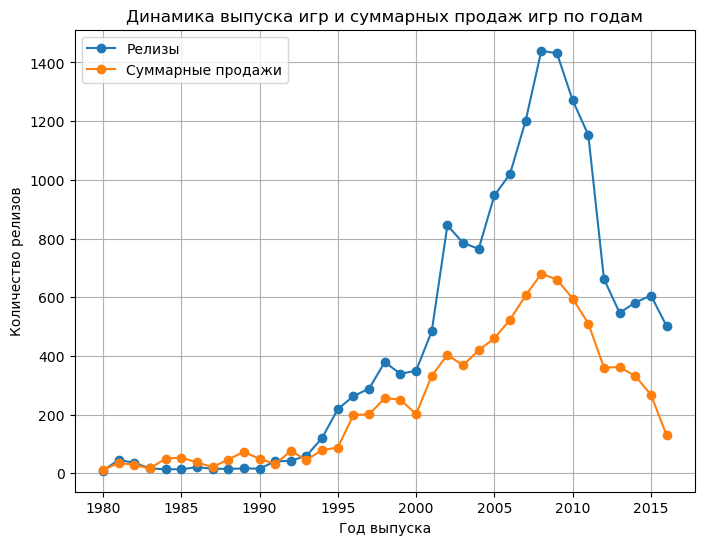

In [46]:
# построим два графика по количеству релизов и по объемам продаж игр:
data_grouped1 = data.groupby('year_of_release')['name'].count().plot(
    grid=True, figsize=(8, 6), style ='o-', label='Релизы')

data_grouped2 = data.groupby('year_of_release')['total_sales'].sum().plot(
    grid=True, figsize=(8, 6), style ='o-', label='Суммарные продажи')

plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество релизов')
plt.title('Динамика выпуска игр и суммарных продаж игр по годам')
plt.show()

Посмотрим, как менялся объем продаж компьютерных игр в зависимости от типа платформы:

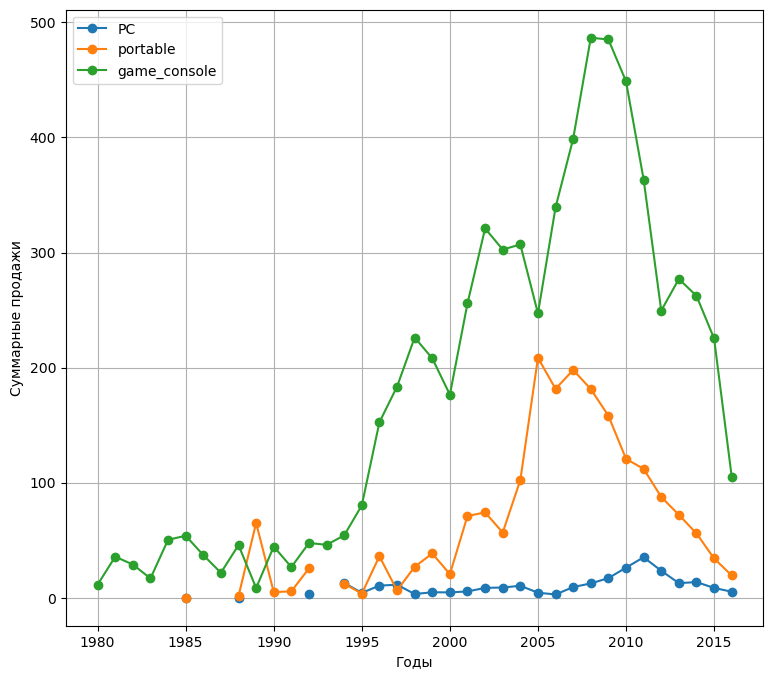

In [47]:
# построим сводная таблицу с объемами продаж игр в зависимости от типа платформы:
platform_type_col = data.pivot_table(index='type_platform', 
                                     values='total_sales', columns='year_of_release',
                                     aggfunc='sum').T
# platform_type_col
# построим график
plt.figure(figsize=(9,8))
plt.plot(platform_type_col['PC'], marker ='o', label='PC')
plt.plot(platform_type_col['portable'], marker ='o', label='portable')
plt.plot(platform_type_col['game_console'], marker ='o', label='game_console')
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.grid()
plt.legend()
plt.show()

Из графика видим следующее: 

в датасете представлены более всего объемы продаж игр на игровых консолях - начиная с 1996 г. объемы продаж превысили отметку в 100 млн.копий и достигли пика на отметке почти 500 млн.копий в 2008 г.(в 1994 г. выпущена игровая консоль PlayStation, в период с 2000 г. по 2006 г. выпущены игровые консоли PlayStation2, Wii, PlayStation3 - по первым трем количество проданных единиц превысило 100 млн. каждая), но с 2013 г. объемы продаж стали падать;

объемы продаж на портативных игровых приставках превысили отметку в 100 млн.копий примерно в 2004 г. и достигли пика на отметке чуть более 200 млн.копий в 2005 г. (в 2004 г. выпущена портативная игровая консоль Nintendo DS, которая стала самой продаваемой портативной игровой консолью);

объемы продаж игр для персональных компьютеров стабильны, существенно не меняются.

Дополнительный материал: https://translated.turbopages.org/proxy_u/en-ru.ru.3c44aaab-63a60a70-9457e6e6-74722d776562/https/en.wikipedia.org/wiki/List_of_best-selling_game_consoles

Text(0, 0.5, 'Объемы продаж')

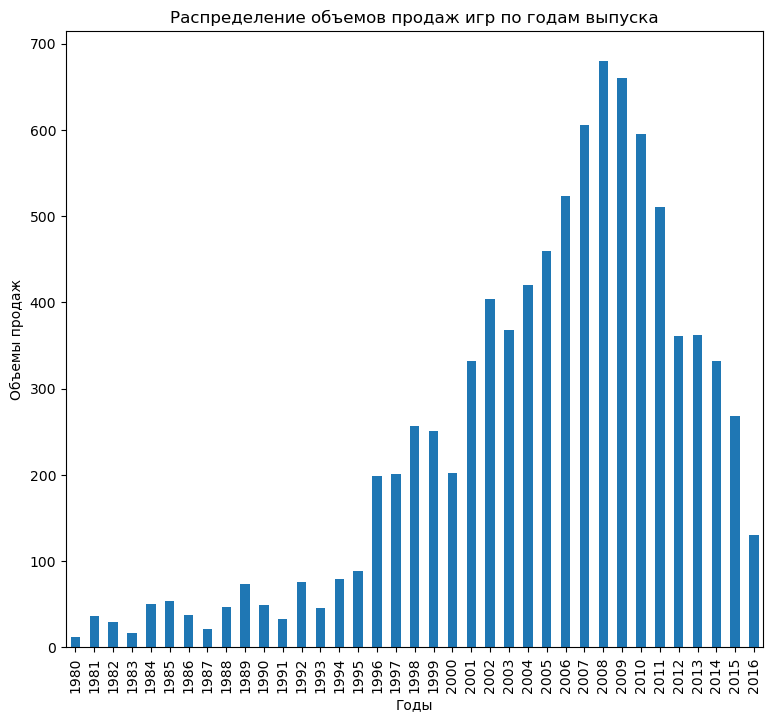

In [48]:
# построим столбчатую диаграмму объемов продаж игр по годам выпуска:
data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar',figsize=(9,8))
plt.title('Распределение объемов продаж игр по годам выпуска')
plt.xlabel('Годы')
plt.ylabel('Объемы продаж')


В период с 1980 по 1995 годы наблюдается неравномерный график продаж компьютерных игр, объемы продаж не превышают 100 млн.копий. С 1996 года наблюдается постепенный рост продаж (объемы продаж достигают отметки в 200 млн.копий), далее наблюдается некоторый упадок в 2000 году, далее - рост продаж с пиком в 2008 году. 
Примерно с 2008 года, когда было продано максимальное количество копий (680 млн.), наблюдается уже спад продаж компьютерных игр. 

Рост продаж с 1996 года с быстрым появлением и распространением персональных компьютеров и игровых консолей. Для анализа данного датасета неактуально рассматривать период ранее 1996 г.

С 2010 года наблюдается спад (по количеству как выпущенных игр, так и по объемам продаж).
Это можно связать с тем, что в нашем датасете отсутствуют данные по самому популярному сейчас сегменту игровой индустрии - мобильные игры.
Стремительное развитие сети интернет привело к появлению большого количества онлайн-игр. В 2000-х снижение стоимости серверов и подключения привело к распространению быстрого интернета; это привело к появлению нового жанра — массовая многопользовательская онлайн-игра, также получили распространение игры в социальных сетях.
Таким образом, повсеместное развитие интернета, распространение смартфонов, популяризация жанра MMORPG и др. - привело к развитию мобильного гейминга, к росту интереса потребителей к играм на мобильных платформах.

### Динамика продаж по платформам:<a id="research2"></a>  </div>

#### Определение платформ с наибольшими суммарными продажами:

In [49]:
# создадим сводную таблицу по названию игры и году выпуска
platforms_of_years = data.pivot_table(index='platform', 
                                      values='total_sales', 
                                      aggfunc='sum').sort_values(by='total_sales', ascending = False)
platforms_of_years


,total_sales
platform,
PS2,"1,247.16"
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


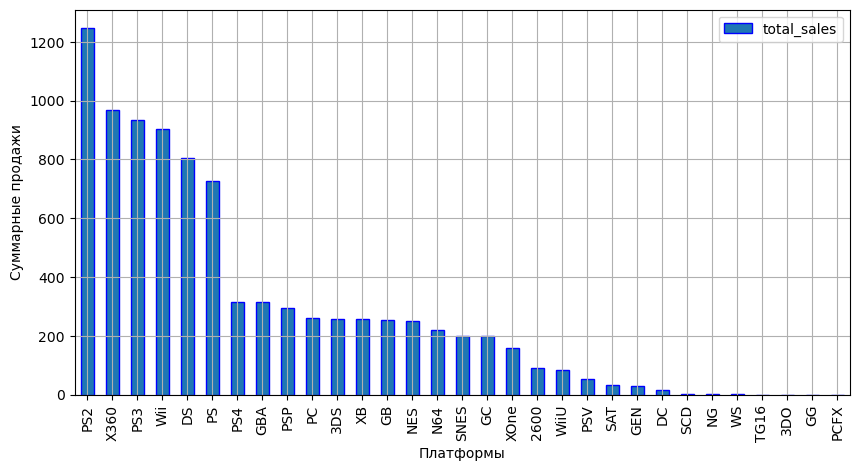

In [50]:
# построим столбчатую диаграмму объемов продаж по платформам
platforms_of_years.plot(kind='bar',figsize=(10, 5), grid=True, ec='blue')
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформы')
plt.show()

Согласно графику, самые продаваемые игры на платформах - PlayStation2 компании SONY, Xbox360 компании Microsoft, PlayStation3 компании SONY, Wii компании Nintendo, DS компании Nintendo, PlayStation компании SONY.

In [51]:
# список 6 top платформ:
list_platform=['PS2','X360','PS3','Wii','DS','PS'] 

In [52]:
# формируем срез по топ-платформам:
top_platform = data.query('platform in @list_platform')
top_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,type_platform
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54,game_console
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52,game_console
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77,game_console
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80,portable
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91,game_console


#### Определение срока жизнеспособности платформы:

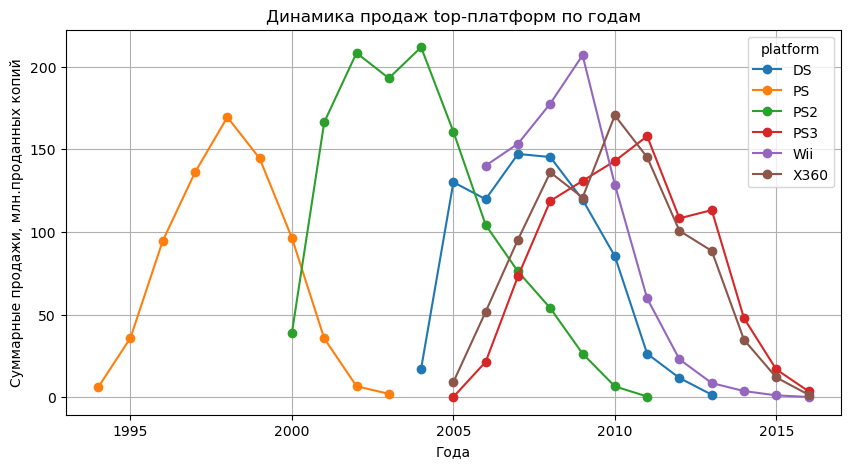

In [53]:
# сделаем сводную таблицу с топ-платформами:
top6 = top_platform.pivot_table(index='year_of_release', columns='platform', 
                         values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 5), style ='o-')
plt.xlim(1993, 2017)
plt.title('Динамика продаж top-платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()


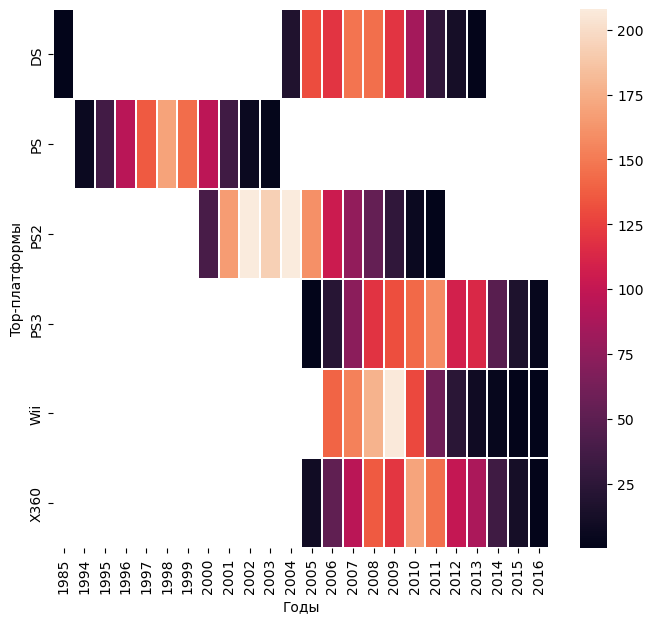

In [54]:
data_top6 = top_platform.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc='sum')
plt.figure(figsize=(8,7))
sns.heatmap(data_top6, robust=True, linewidths=.2)

plt.xlabel('Годы')
plt.ylabel('Top-платформы')
plt.show()

По графикам видно, что в среднем срок жизнеспособности платформы составляет 10-12 лет. Пик продаж приходит в среднем через 4-5 лет, т.е. в самой середине срока. У компания SONY наблюдается "лестница" в графике: т.е. компания начинает релиз новой платформы в момент, когда предыдущая платформа достигает пика и начинается спад продаж. 

Платформа DS вернулась в обновленной версии на рынок в 2004 г. и просуществовала до 2013 г. 

В 2005-2006 гг. появились новые платформы, которые завоевали популярность. Как раз в тот момент, когда продажи PS2 стали падать, компания SONY запускает новую платформу PS3. Платформа Wii с первого года имела высокие продажи, которые постепенно снижались. Для этих платформ с 2013 г. характерен спад продаж.

Таким образом, для построения прогноза на 2017 г. определим актуальный период для анализа:

т.к. средний срок жизнеспособности платформы составляет 10-12 лет, платформы старше 10 лет уже исчерпали свой ресурс, пик продаж у платформ приходится на середину срока жизнеспособности (4-5 лет), спад продаж по трем последним платформам в "шестерке топ-платформам датасета"  наблюдается с 2013 г., то за основу анализа возьмем период с 2013 г. 

#### Анализ динамики продаж по платформам за актуальный период (2013-2016 гг.):

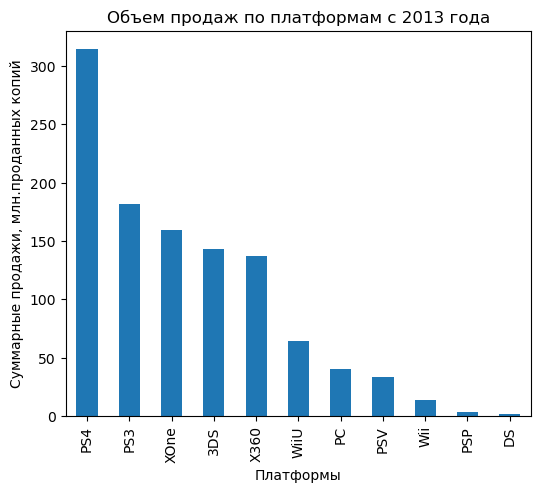

In [55]:
# сделаем срез данных по актуальному периоду не ранее 2012 года, т.е. с 2013 г.:
actual_data = data.query('year_of_release >= 2013')

# построим столбчатую диаграмму по суммарным продажам по платформам, входящих в актуальный период анализа:
actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(6,5))

plt.title('Объем продаж по платформам с 2013 года')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.show()

In [56]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,type_platform
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05,game_console
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27,game_console
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63,game_console
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,ND,14.60,portable
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62,game_console


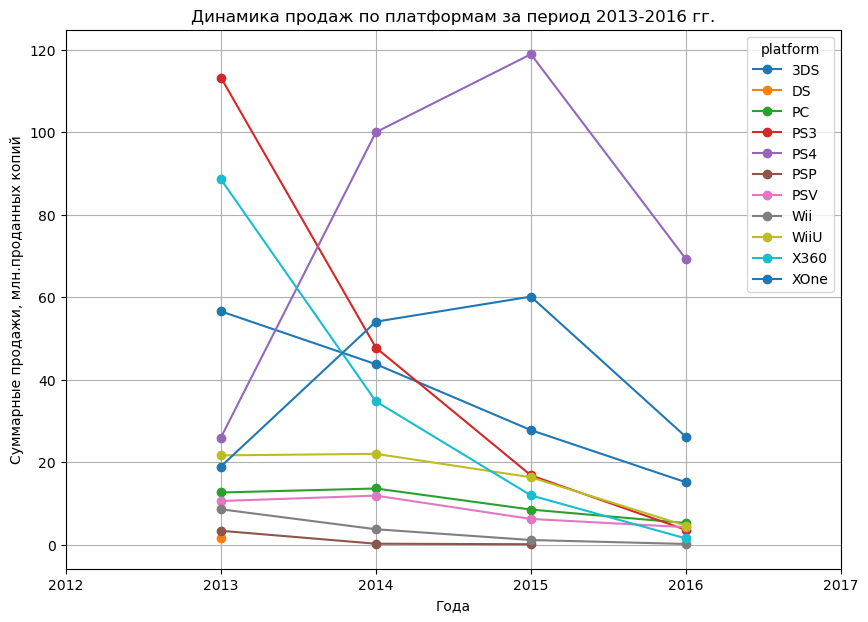

In [57]:
# сделаем сводную таблицу по этим платформам - посмотрим динамику продаж в актуальном периоде:
actual_data.pivot_table(index='year_of_release', columns='platform', 
                         values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 7), style ='o-')
plt.xlim(2012, 2017)
plt.title('Динамика продаж по платформам за период 2013-2016 гг.')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()

На графике видим, что для всех платформ, продаваемых в рассматриваемом актуальном периоде (с 2013 по 2016 гг.), за исключением платформ PlayStation4 компании SONY и XboxOne компании Microsoft, наблюдается спад продаж.

Самый заметный спад продаж отмечается в 2013 г. у платформ PlayStation3 компании SONY, Xbox360 компании Microsoft, 3DS компании Nintendo.

Рост продаж с 2013 г. отмечается у двух платформ - PlayStation4 компании SONY, XboxOne компании Microsoft.

Именно эти две платформы обозначим как потенциально прибыльные в актуальном периоде.

В 2016 г. самые высокие продажи игр отмечаются (или сохраняются) у платформ (по убыванию): PlayStation4 компании SONY, XboxOne компании Microsoft, 3DS компании Nintendo, PC. 

In [58]:
actual_data.pivot_table(index='platform', columns='year_of_release', 
                         values='total_sales', aggfunc='sum')

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,NaN,NaN,NaN
PC,12.66,13.63,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSP,3.38,0.24,0.12,NaN
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60


#### Анализ продаж игр по наиболее прибыльным платформам в актуальном периоде (2013-2016 гг.):

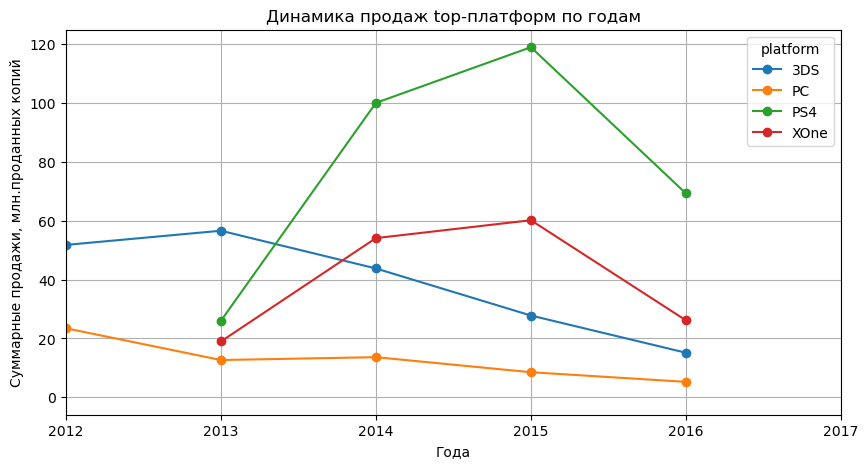

In [59]:
# запишем список с 4-мя платформами, по которым в 2016 г. наблюдаются наибольшие объемы продаж игр:
spisok_platform_best4=['PS4','XOne','3DS','PC']

# в переменную platform_best4 запишем срез данных по продажам игр по этим платформам:
platform_best4 = data.query('platform in @spisok_platform_best4')

# построим сводную таблицу по суммарным продажам игр на этих 4 платформах:
platform_best4_pivot1 = platform_best4.pivot_table(index='year_of_release', columns='platform', 
                         values='total_sales', aggfunc='sum').plot(grid=True, figsize=(10, 5), style ='o-')
plt.xlim(2012, 2017)
plt.title('Динамика продаж top-платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()


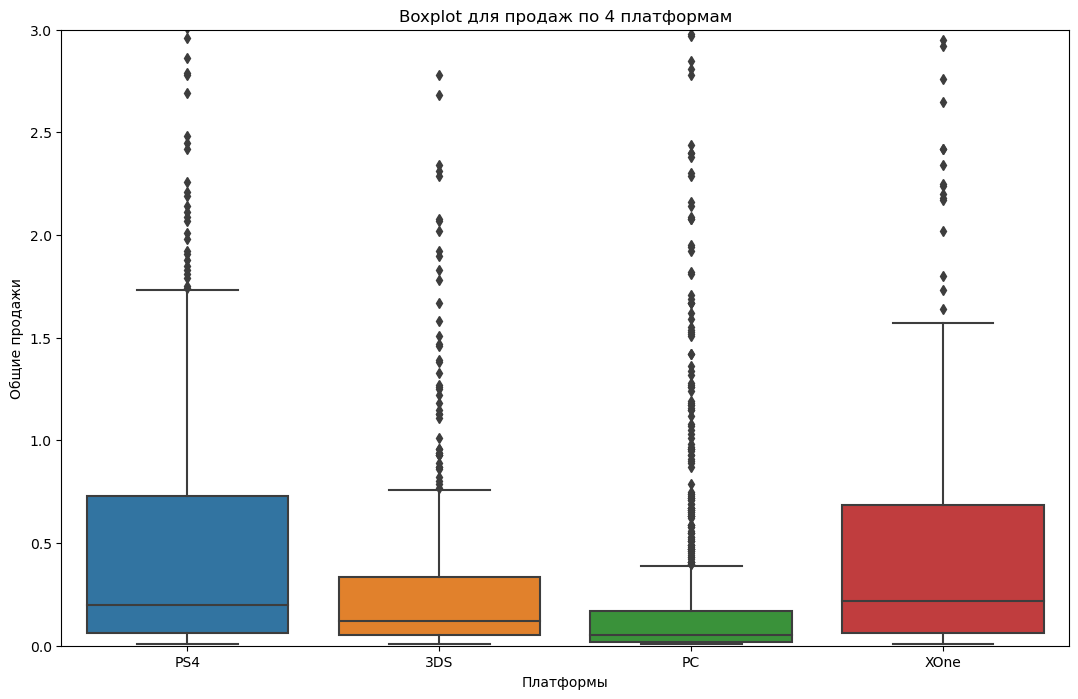

In [60]:
# построим диаграмму размаха по суммарным продажам игр на самых продаваемых в 2016 г. платформах:
plt.figure(figsize=(13,8))
sns.boxplot(data= platform_best4, x = 'platform',  y= 'total_sales')\
.set(title = 'Boxplot для продаж по 4 платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0,3))
plt.show()

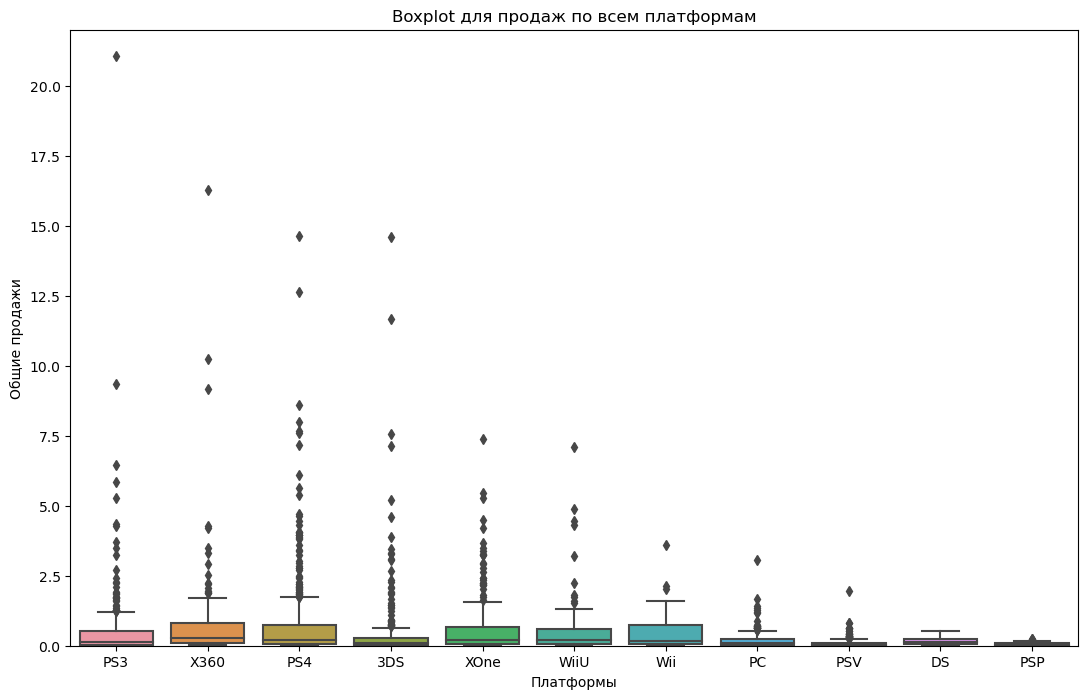

In [61]:
# построим диаграмму размаха по суммарным продажам игр (актуального периода) на всех платформах:
# boxplot выведим немасштабированный с выбросами:
plt.figure(figsize=(13,8))
sns.boxplot(data= actual_data, x = 'platform',  y= 'total_sales')\
.set(title = 'Boxplot для продаж по всем платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0,22))
plt.show()

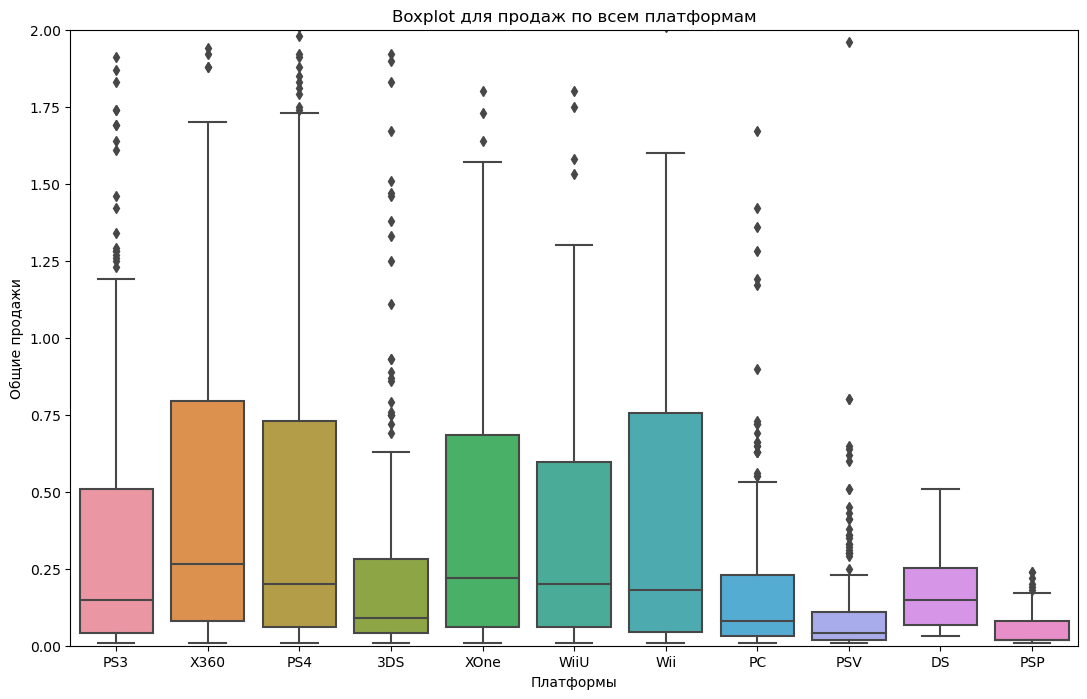

In [62]:
# теперь выведим boxplot в масштабированном виде:
plt.figure(figsize=(13,8))
sns.boxplot(data= actual_data, x = 'platform',  y= 'total_sales')\
.set(title = 'Boxplot для продаж по всем платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0,2))
plt.show()

In [63]:
# также посмотрим средние и медианные значения по продажам этих платформ в актуальном периоде
platforms_all = actual_data.pivot_table(index='platform',  
                         values='total_sales', aggfunc=['sum','mean','median', 'max','var']).sort_values(
    ('median', 'total_sales'), ascending=False)

platforms_all

,sum,mean,median,max,var
,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,
X360,136.80,0.74,0.27,16.27,2.77
XOne,159.32,0.65,0.22,7.39,1.07
PS4,314.14,0.80,0.20,14.63,2.59
WiiU,64.63,0.56,0.20,7.09,1.08
Wii,13.66,0.59,0.18,3.58,0.84
DS,1.54,0.19,0.15,0.51,0.03
PS3,181.43,0.53,0.15,21.05,2.11
3DS,143.25,0.47,0.09,14.60,1.91


Согласно таблице, лидером продаж в актуальном периоде (по медианному значению) является Xbox360 компании Microsoft, далее - XboxOne компании Microsoft, PlayStation4 компании SONY, WiiU и Wii компании Nintendo. У этих платформ также самые большие объемы суммарных продаж.  

Диаграммы размаха платформ Xbox360, Wii, PlayStation4, XboxOne более или менее похожи: почти одинаковый размах продаж (одинаковый размер boxplot, почти одинаковые границы третьего квартиля в отметке около 0.75 млн.к.). Медианные значения по продажам у этих платформ наблюдаются на отметке около 0.25 млн.к. Среднее значение продаж у PS4 и у Xbox360 почти одинаковые и чуть выше, чем у XOne.

Выделим также платформу WiiU (новичка рынка) - у нее boxplot поменьше, чем у выше рассмотренных, диаграмма размаха похоже с диаграммой размаха платформы PS3 ("старожила рынка"). 

К новинкам рынка относится также платформа 3DS. У нее более узкий "ящик с усами" и много выбросов - это отражает меньший размах в объемах продаж, а также то, что большая часть продаж производилась за счет выбросов (выпуска популярных игр).

Наличие выбросов у платформ показывает продажи каких-то суперпопулярных игр. Так, самые высокие продажи (максимальные выбросы) отмечены у платформ PlayStation3, Xbox360, PlayStation4 и 3DS компании Nintendo. 
Самая продаваемая игра у PS3: Grand Theft Auto V на платформе PlayStation3.

C boxplot платформы 3DS похож boxplot платформа ПК является - самая стабильная платформа. 

**Потенциально прибыльные платформы в периоде 2013-2016 гг.:** PlayStation4 компании SONY, XboxOne компании Microsoft, Xbox360 компании Microsoft, Wii и WiiU компании Nintendo (из них две платформы X360, Wii существуют на рынке уже несколько лет и у них наблюдается спад продаж).

### Анализ влияния на продажи игр внутри одной платформы отзывов критиков и пользователей. Сравнение зависимости продаж от оценки критиков и пользователей на других платформах <a id="research4"></a>  </div>

Для определения того, как влияют отзывы критиков и пользователей на продажи игр в рамках одной платформы - выберем платформу PlayStation4 компании SONY.

In [70]:
# создадим переменную ps4:
ps4 = actual_data.query('platform == "PS4"')

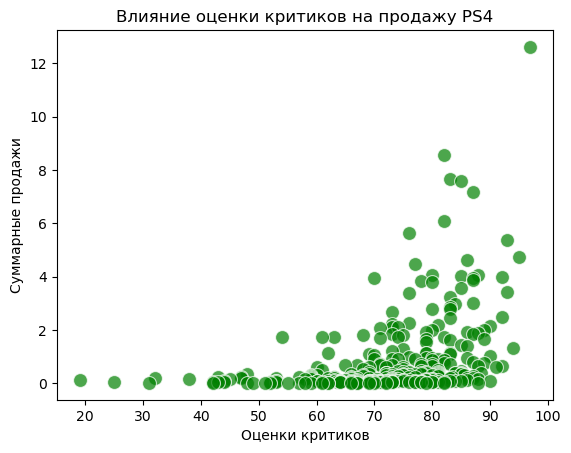

In [71]:
# построим диаграмму рассеяния между величинами "оценки критиков" и "суммарные продажи" для платформы PS4:

sns.scatterplot(x='critic_score', y='total_sales', data= ps4, alpha=0.7, color='green', s=100)
plt.title('Влияние оценки критиков на продажy PS4')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценки критиков')
plt.show()

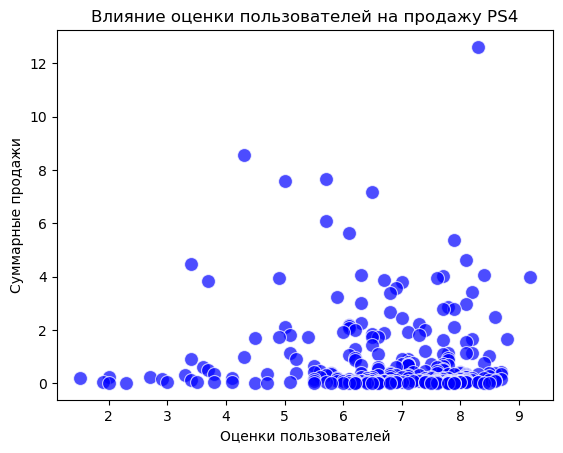

In [72]:
# построим диаграмму рассеяния между величинами "оценки пользователей" и "суммарные продажи" для платформы PS4:

sns.scatterplot(x='user_score', y='total_sales', data= ps4, alpha=0.7, color='blue', s=100)
plt.title('Влияние оценки пользователей на продажy PS4')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценки пользователей')
plt.show()

In [73]:
# посмотрим коэффициент корреляции Пирсона между оценками критиков и пользователей и суммарными продажами:
print(f'Корреляция между оценками критиков и продажами: {ps4.critic_score.corr(ps4.total_sales):.2}')
print(f'Корреляция между оценками пользователей и продажами: {ps4.user_score.corr(ps4.total_sales):.2}')


Корреляция между оценками критиков и продажами: 0.39
Корреляция между оценками пользователей и продажами: -0.032


Вывод:

Коэффициент корреляции между оценками критиков и продажами игр на платформе PS4 = 0.39, что свидетельствует о наличии слабой связи между этими параметрами. На диаграмме рассеяния наблюдаем, что при увеличении оценки критиков увеличиваются продажи игр на платформе.

Коэффициент корреляции между оценками пользователей и продажами игр на платформе PS4 = -0.032, что свидетельствует об отсутствии связи между этими параметрами. Отрицательное значение скорее говорит о том, что пользователи чаще оставляют негативные отзывы о каких-то продуктах, чем положительные. 

Теперь для определения того, как влияют отзывы критиков и пользователей на продажи игр в рамках одной платформы - выберем платформу XboxOne компании Microsoft (данная платформа также появилась в 2013 г.).

In [74]:
# создадим переменную xone:
xone = actual_data.query('platform == "XOne"')

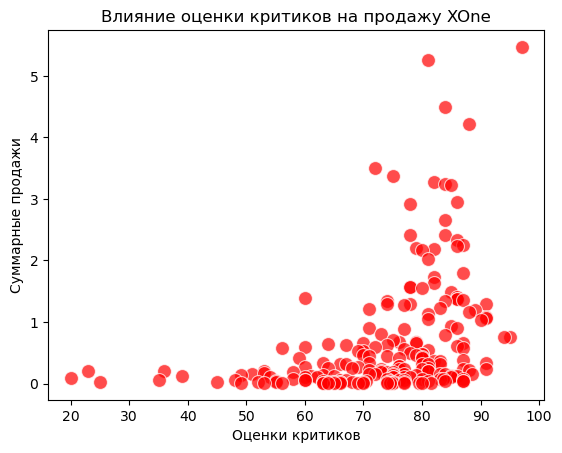

In [75]:
# построим диаграмму рассеяния между величинами "оценки критиков" и "суммарные продажи" для платформы XOne:

sns.scatterplot(x='critic_score', y='total_sales', data= xone, alpha=0.7, color='red', s=100)
plt.title('Влияние оценки критиков на продажy XOne')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценки критиков')
plt.show()

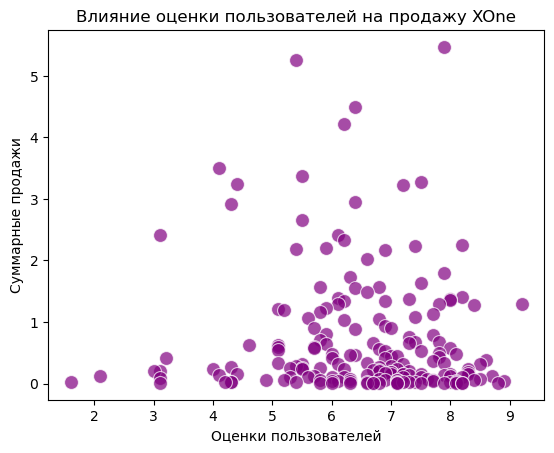

In [76]:
# построим диаграмму рассеяния между величинами "оценки пользователей" и "суммарные продажи" для платформы XOne:

sns.scatterplot(x='user_score', y='total_sales', data= xone, alpha=0.7, color='purple', s=100)
plt.title('Влияние оценки пользователей на продажy XOne')
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценки пользователей')
plt.show()

In [77]:
# посмотрим коэффициент корреляции Пирсона между оценками критиков и пользователей и суммарными продажами:
print(f'Корреляция между оценками критиков и продажами: {xone.critic_score.corr(xone.total_sales):.2}')
print(f'Корреляция между оценками пользователей и продажами: {xone.user_score.corr(xone.total_sales):.2}')

Корреляция между оценками критиков и продажами: 0.37
Корреляция между оценками пользователей и продажами: -0.069


Вывод:

Коэффициент корреляции между оценками критиков и продажами игр на платформе XOne = 0.37, что свидетельствует о наличии слабой связи между этими параметрами. На диаграмме рассеяния также наблюдаем, что при увеличении оценки критиков увеличиваются продажи игр на платформе.

Коэффициент корреляции между оценками пользователей и продажами игр на платформе XOne = -0.069, что свидетельствует об отсутствии связи между этими параметрами. 

Выше посмотрели как влияют оценки критиков и пользователей на продажи игр по платформам PlayStation4 и XboxOne.

Теперь сопоставим наши выводы с продажи игр на других платформах: X360, PS3, WiiU, 3DS. 

In [78]:
# создаем список платформ:
platforms = ['X360', 'PS3', 'WiiU', '3DS']

# делаем по этим платформам срез:
platforms_other = actual_data.query('platform in @platforms')

3DS


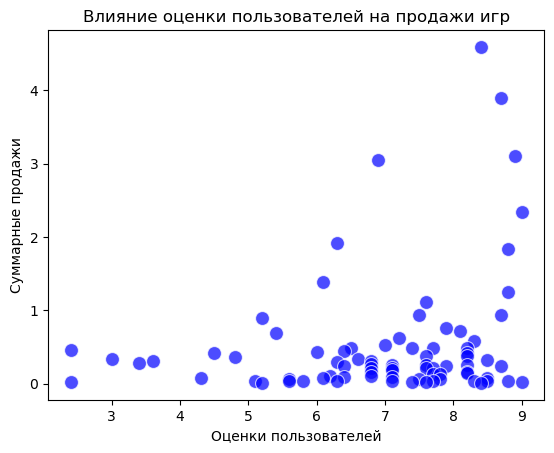

PS3


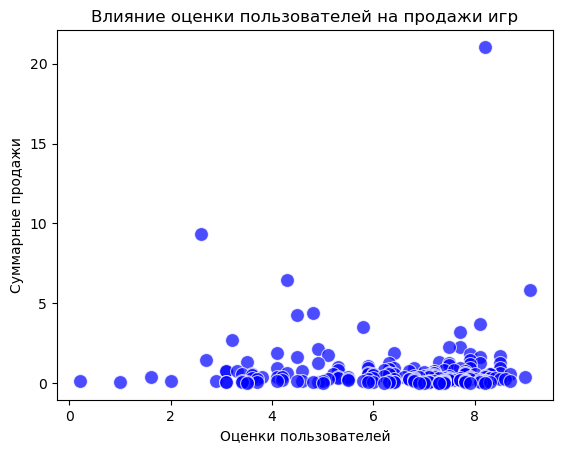

WiiU


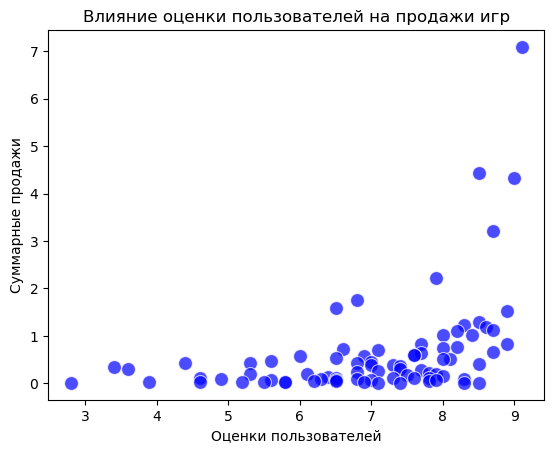

X360


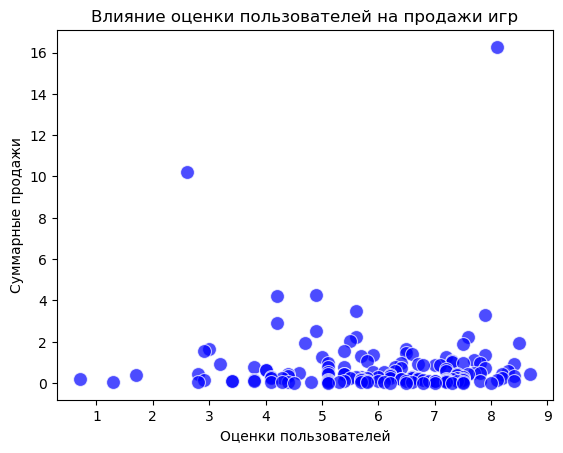

In [79]:
# c помощью цикла построим диаграммы рассеяния между величинами "оценки пользователей" и "суммарные продажи":
for platform, games_on_platform in platforms_other.groupby('platform'):
    print(platform)
    sns.scatterplot(x='user_score', y='total_sales', data= games_on_platform, alpha=0.7, color='blue', s=100)
    plt.title('Влияние оценки пользователей на продажи игр')
    plt.ylabel('Суммарные продажи')
    plt.xlabel('Оценки пользователей')
    plt.show()

3DS


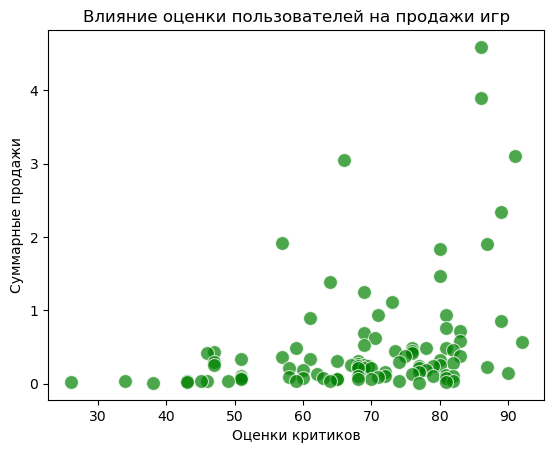

PS3


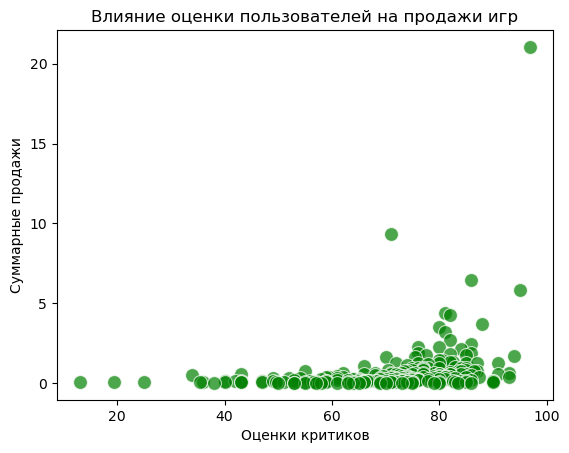

WiiU


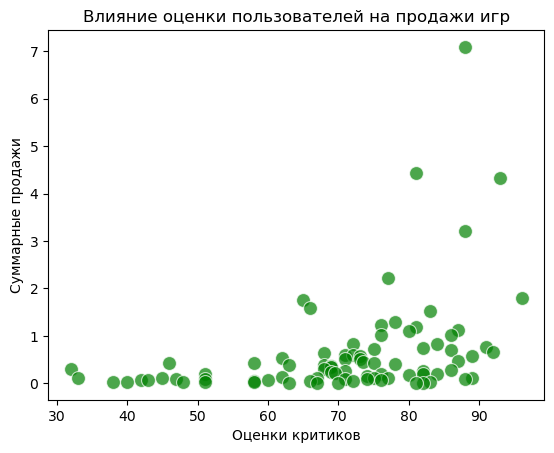

X360


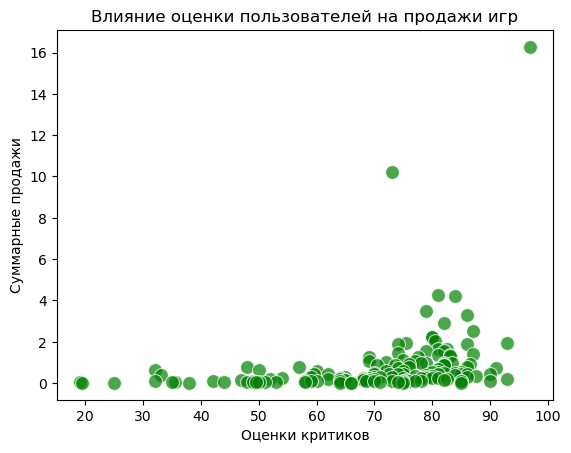

In [80]:
# c помощью цикла построим диаграммы рассеяния между величинами "оценки критиков" и "суммарные продажи":
for platform, games_on_platform in platforms_other.groupby('platform'):
    print(platform)
    sns.scatterplot(x='critic_score', y='total_sales', data= games_on_platform, alpha=0.7, color='green', s=100)
    plt.title('Влияние оценки пользователей на продажи игр')
    plt.ylabel('Суммарные продажи')
    plt.xlabel('Оценки критиков')
    plt.show()

По диаграммам рассеяния зависимости между оценками пользователей или оценками критиков и суммарными продажами игр для различных платформ мы видим следующее:
графики для платформ WiiU, 3DS компании Nintendo выглядят более "разбросанными", чем графики для платформ PS3, X360. 
На первых графиках чаще наблюдается увеличение количества значений (скопление точек) при более высоких оценках пользователей или критиков.
Отметим, что платформы WiiU, 3DS произведены в Японии и входят в топ-5 платформ пользователей Японии (особенно портативная игровая консоль 3DS). 
У платформы Wii мало оценок, поэтому график неинформативен.

Определим коэффициенты корреляции Пирсона между оценками пользователей и суммарными продажами игр для платформ PS3, WiiU, X360, 3DS:

In [81]:
# c помощью цикла рассчитаем коэффициенты корреляции между оценками пользователей /критиков и суммарными продажами:
for platform, games_on_platform in platforms_other.groupby('platform'):
    print(f'Корреляция между оценками пользов. и продажами - {platform}:\
    {games_on_platform.user_score.corr(games_on_platform.total_sales):.2}')
    print(f'Корреляция между оценками критиков и продажами - {platform}: \
    {games_on_platform.critic_score.corr(games_on_platform.total_sales):.2}')
    print()


Корреляция между оценками пользов. и продажами - 3DS:    0.24
Корреляция между оценками критиков и продажами - 3DS:     0.34

Корреляция между оценками пользов. и продажами - PS3:    0.0024
Корреляция между оценками критиков и продажами - PS3:     0.29

Корреляция между оценками пользов. и продажами - WiiU:    0.42
Корреляция между оценками критиков и продажами - WiiU:     0.38

Корреляция между оценками пользов. и продажами - X360:    -0.012
Корреляция между оценками критиков и продажами - X360:     0.29



In [82]:
actual_data.groupby('platform')['user_score'].count()

platform
3DS      80
DS        1
PC      158
PS3     186
PS4     257
PSP       2
PSV      99
Wii       7
WiiU     80
X360    143
XOne    182
Name: user_score, dtype: int64

Полученные коэффициенты корреляции показывают, что связь между оценками критиков и продажами имеется положительная, но слабая. Причем коэффициент корреляции между этими параметрами для платформ WiiU, 3DS выше, чем для платформ PS3, X360.

Если посмотреть коэффициенты корреляции между оценками пользователей и продажами по платформам PS3, X360 - видим очень низкое значение коэффициента (и даже отрицательную связь), которое не позволяет нам сделать вывод о корреляции между этими параметрами. Такую же ситуацию мы наблюдали выше при рассмотрении коэффициентов корреляции между этими параметрами для платформ PS4, XOne.

В свою очередь, коэффициенты корреляции между оценками пользователей и продажами по платформам WiiU, 3DS указывают на слабую, но положительную связь между этими парамтерами (особенно в отношении платформы WiiU).
Однозначно интерпретировать этот результат мне сложно.
Может такой результат связан с небольшим количеством оценок, может как-то связан с рекламными кампаниями платформы/игр, а можно предположить, что в среде некоторых пользователей компьютерных игр (в данном случае - японских) развита система оценивания игр и более значимое отношение к оценке игр. 

*Вывод*: связь между оценками критиков и продажами игр прослеживается более заметно, чем связь между оценками пользователей и продажами игр. Связь между оценками критиков и продажами игр имеет положительный слабый характер. Оценки пользователей игр не коррелирует напрямую с продажами игр, возможно на связь между этими параметрами оказывает влияние другой фактор (например, значимость оценки игры при выборе игры для определенного круга пользователей).

### Анализ игр по жанрам: <a id="research5"></a>  </div>

In [83]:
# сделаем сводную табл. по жанрам и продажам игр актуального периода, отсортируем по объему продаж:
genre_pivot1 = actual_data.pivot_table(index = 'genre', values = 'total_sales', 
                                      aggfunc = ['sum','count']).sort_values(('sum', 'total_sales'), ascending=False)
genre_pivot1.columns = ['Суммарные продажи','Кол-во игр']

genre_pivot1

,Суммарные продажи,Кол-во игр
genre,,
Action,322.50,769
Shooter,232.98,187
Sports,150.65,214
Role-Playing,145.89,292
Misc,63.06,156
Platform,42.63,74
Racing,39.89,85
Fighting,35.31,80
Adventure,23.64,245


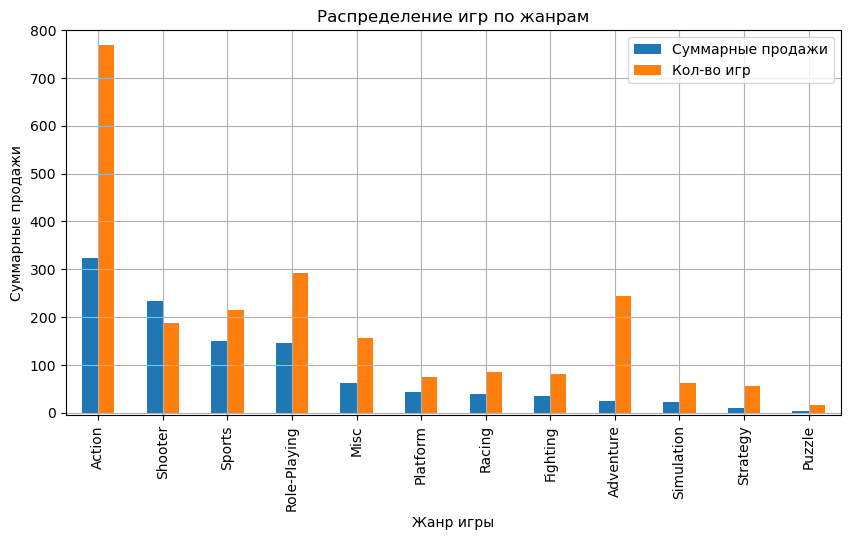

In [84]:
# нарисуем столбчатую диаграмму
genre_pivot1.plot(kind='bar',figsize=(10, 5), grid=True, ylim=(-5,800))                         
plt.title('Распределение игр по жанрам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанр игры')
plt.show()

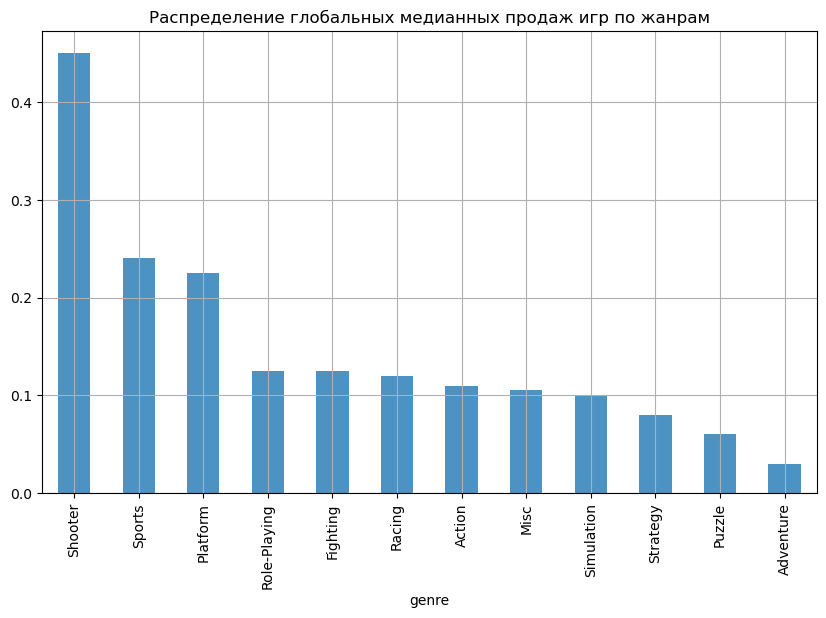

In [85]:
actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(
    y='genre',grid=True,figsize=(10,6),kind='bar',alpha=0.8,title='Распределение глобальных медианных продаж игр по жанрам')
plt.show()

Анализируя полученные графики, можно выделить следующие наиболее продаваемые компьютерные игры по жанру:

 - action (экшн или боевик);
 - shooter ("стрелялка");
 - sports (спортивная игра);
 - role-playing (ролевая игра);
 - misc (музыкальная игра? или неопределенный жанр);
 - platform (платформер - передвижение по платформам);
 - racing (гоночная игра);
 - fighting (игра в стиле боя);
 - adventure (приключенческая игра).
 
Больше всего пользователи покупают игры в жанре Action (доминирующее место по количеству проданных игр), ролевые игры, приключенческие игры, спортивные игры, а меньше всего игры в жанре puzzle, strategy. 

Если же смотреть по распределению медианных значений суммарных продаж игр по жанрам, то наиболее прибыльными играми в плане выручки является игры жанра shooter, sports, platform, ролевые игры, fighting. 
 

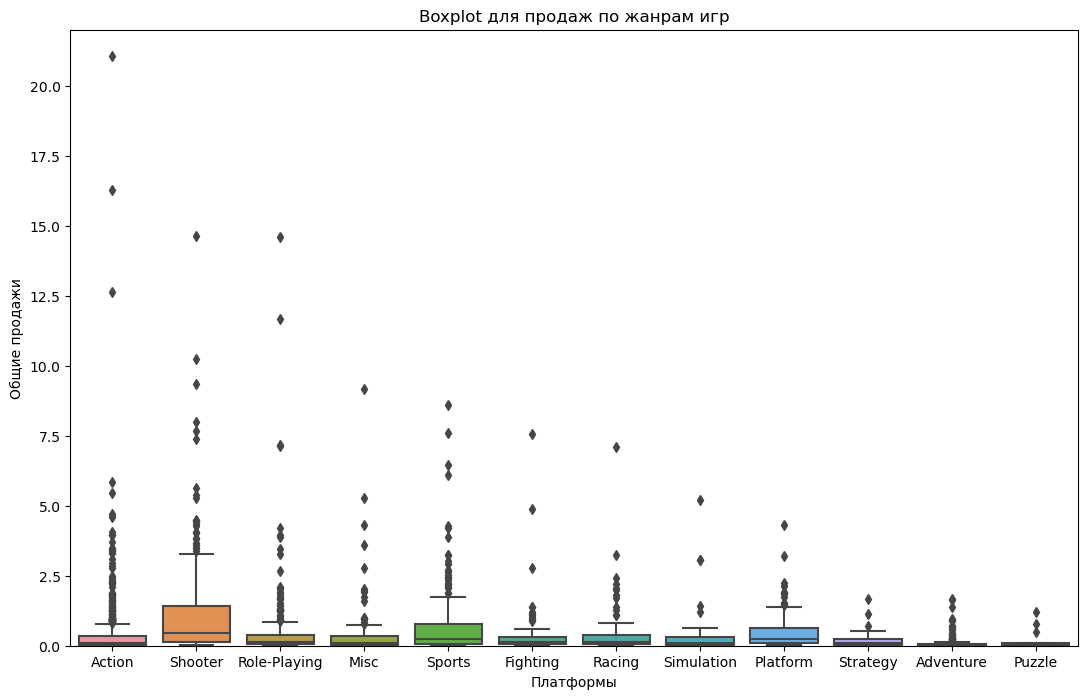

In [86]:
# построим диаграмму размаха по суммарным продажам игр (актуального периода) по жанрам:
# boxplot выведим немасштабированный с выбросами:
plt.figure(figsize=(13,8))
sns.boxplot(data= actual_data, x = 'genre',  y= 'total_sales')\
.set(title = 'Boxplot для продаж по жанрам игр', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0,22))
plt.show()

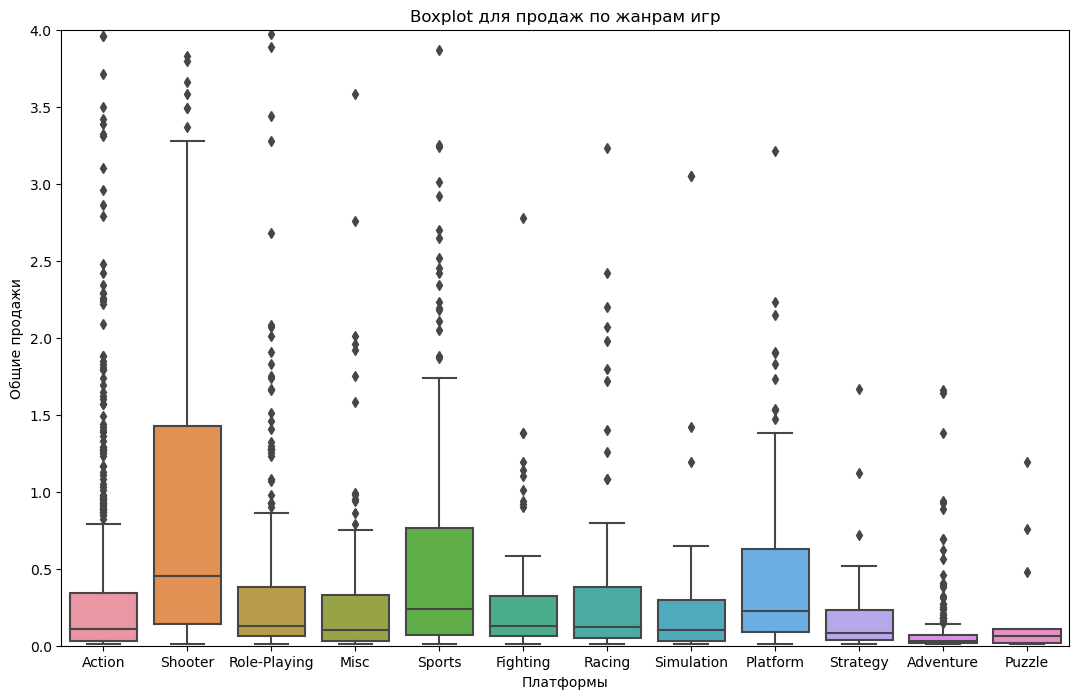

In [87]:
# построим диаграмму размаха по суммарным продажам игр (актуального периода) по жанрам:
# boxplot выведим c масштабом:
plt.figure(figsize=(13,8))
sns.boxplot(data= actual_data, x = 'genre',  y= 'total_sales')\
.set(title = 'Boxplot для продаж по жанрам игр', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0,4))
plt.show()

In [88]:
# также посмотрим средние и медианные значения продаж по жанрам в актуальном периоде
genre_all = actual_data.pivot_table(index='genre',  
                         values='total_sales', aggfunc=['sum','mean','median', 'max','var']).sort_values(
    ('median', 'total_sales'), ascending=False)

genre_all

,sum,mean,median,max,var
,total_sales,total_sales,total_sales,total_sales,total_sales
genre,,,,,
Shooter,232.98,1.25,0.45,14.63,4.06
Sports,150.65,0.70,0.24,8.58,1.49
Platform,42.63,0.58,0.22,4.32,0.65
Role-Playing,145.89,0.50,0.12,14.60,1.83
Fighting,35.31,0.44,0.12,7.55,1.10
Racing,39.89,0.47,0.12,7.09,0.93
Action,322.50,0.42,0.11,21.05,1.57
Misc,63.06,0.40,0.10,9.18,1.01


По диаграммам размаха суммарных продаж по жанрам игр видим, что boxplot для жанра shooter самый широкий, вытянутый (это свидетельствует о большом разбросе значений). Максимальное значение продаж игр в жанре shooter без выбросов приходится на отметку около 3.3 млн.к. Медианное значение продаж приходится на отметку около 0.5 млн.к., что в 4 раза больше медианного значения продаж игр в самом представленном на рынке игр жанре action. Средние продажи игр в жанре shooter почти в 2 раза превышают средние продажи игр следующего по прибыльности жанра - sports.
Максимальные выбросы (т.е. популярные игры) мы видим в жанрах action, shooter, ролевые игры.
По диаграммам размаха самые прибыльные жанры игр - shooter, sports и platform.


### Вывод по разделу:  <a id="research6"></a>  </div>

В рамках исследовательского этапа анализа данных проведено следующее:

   1) проанализирована динамика выпуска игр по годам;
   
   2) проанализирована динамика продаж по платформам:
   
   2.1.) определены платформы с наибольшими суммарными продажами - PlayStation2 компании SONY, Xbox360 компании Microsoft, PlayStation3 компании SONY, Wii компании Nintendo, DS компании Nintendo, PlayStation компании SONY.
   
   2.2.) определен средний срок жизнеспособности платформы - 10-12 лет, определен актуальный период с 2013 г. по 2016 г. для дальнейшего анализа факторов, определяющих успешность компьютерных игр, прогноза потенциально прибыльных платформ.
   
   2.3.) анализ продаж по прибыльным платформам - самые прибыльные платформы PlayStation4 компании SONY, XboxOne компании Microsoft, Xbox360 компании Microsoft, Wii и WiiU компании Nintendo.

   2.4.) изучено влияние на продажи игр оценок критиков и пользователей в рамках одной популярной платформы (PlayStation4 компании SONY)  и проведено сопоставление результатов по другим платформам (XboxOne компании Microsoft, PlayStation3 компании SONY, 3DS и WiiU компании Nintendo). Cвязь между оценками критиков и продажами игр прослеживается более заметно, чем связь между оценками пользователей и продажами игр. Связь между оценками критиков и продажами игр имеет положительный слабый характер. Оценки пользователей игр не коррелирует напрямую с продажами игр, возможно на связь между этими параметрами оказывает влияние другой фактор (например, значимость оценки игры при выборе игры для определенного круга пользователей).
   
   2.5.) определены самые продаваемые и прибыльные жанры компьютерных игр - игры жанра shooter, sports, platform, ролевые игры, fighting.    
   
   

## Портрет пользователя для каждого региона: <a id="research7"></a>  </div>

В датасете есть информация о продажах игр в следующих регионах:

  - na_sales - продажи в Северной Америке (млн.проданных копий);
  - eu_sales - продажи в Европе (млн.проданных копий);
  - jp_sales - продажи в Японии (млн.проданных копий);
  - other_sales - продажи в других странах (млн.проданных копий).

### Определение популярных платформ (топ-5) в регионе:

In [89]:
# создадим список регионов Северной Америки, Европы, Японии:
spisok_regions = ['na_sales', 'eu_sales', 'jp_sales']

In [90]:
print("Суммарные продажи и доли продаж в регионе:")
total_sum = actual_data['na_sales'].sum() + actual_data['eu_sales'].sum() + actual_data['jp_sales'].sum()
for region in spisok_regions:
    sum_region = actual_data[region].sum() 
    share_region = (actual_data[region].sum())/total_sum*100
    print(region, round(sum_region), '  ', round(share_region),'%')

Суммарные продажи и доли продаж в регионе:
na_sales 438    45 %
eu_sales 393    40 %
jp_sales 141    15 %


In [91]:
# построим сводную таблицу по суммарным продажам платформ для каждого региона:
data_regions = actual_data.pivot_table(index='platform', 
                                           values=['na_sales', 'eu_sales', 'jp_sales'], 
                                           aggfunc='sum')
data_regions

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.84,0.00,11.19
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.53,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


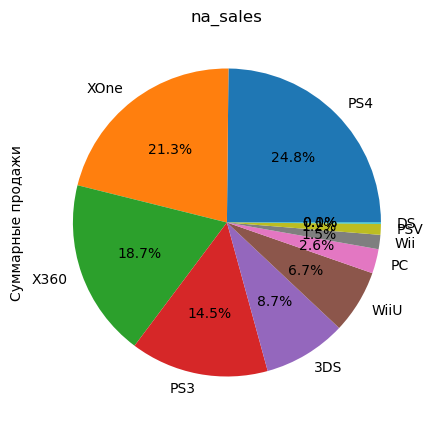

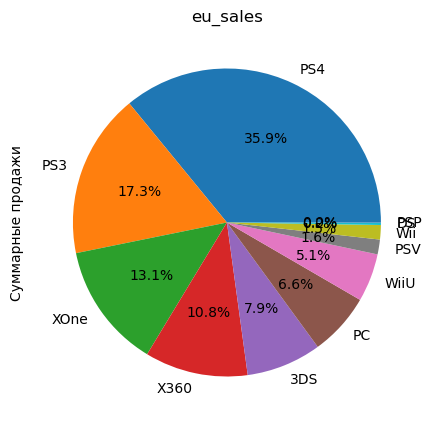

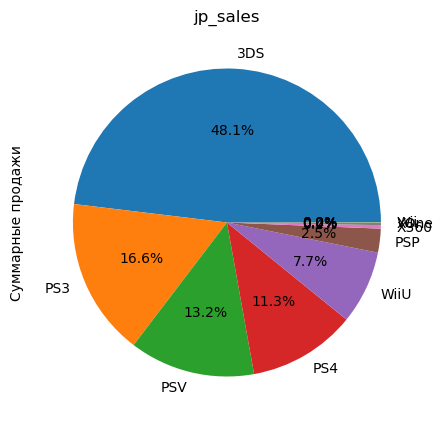

In [107]:
# с помощью цикла построим круговые диаграммы с распределением суммарных продаж игр по платформам для каждого региона:
for region in spisok_regions:
    (data_regions.sort_values(by=region,ascending=False)
     .plot(kind='pie', y=region, legend=False, figsize=(5, 5), title = region, autopct='%1.1f%%')
     .set(ylabel='Суммарные продажи')
    )
    plt.show()

***Самые популярные платформы (топ-5) по продажам игр в Северной Америке за период 2013-2016 гг.:***

 - PlayStation4 компании SONY (доля продаж составила 24.8%);
 - XboxOne компании Microsoft (доля продаж составила 21.3%);
 - Xbox360 компании Microsoft (доля продаж составила 18.7%);
 - PlayStation3 компании SONY (доля продаж составила 14.5%);
 - 3DS компании Nintendo (доля продаж составила 8.7%).
 
***Самые популярные платформы (топ-5) по продажам игр в Европе за период 2013-2016 гг.:***

 - PlayStation4 компании SONY (доля продаж составила 35.9%);
 - PlayStation3 компании SONY (доля продаж составила 17.3%);
 - XboxOne компании Microsoft (доля продаж составила 13.1%);
 - Xbox360 компании Microsoft (доля продаж составила 10.8%);
 - 3DS компании Nintendo (доля продаж составила 7.9%). 
 
***Самые популярные платформы (топ-5) по продажам игр в Японии за период 2013-2016 гг.:***

 - 3DS компании Nintendo (доля продаж составила 48.1%); 
 - PlayStation3 компании SONY (доля продаж составила 16.6%);
 - PlayStation Vita компании SONY (доля продаж составила 13.2%);
 - PlayStation4 компании SONY (доля продаж составила 11.3%);
 - WiiU компании Nintendo (доля продаж составила 7.7%).
  

***Вывод:***

В Северной Америке и в Европе почти одинаковые предпочтения по платформам для игр: 
- в обоих регионах по объемам продаж лидирует PlayStation4 компании SONY (причем в Европе объем продаж данной платформы выше почти в 1.5 раза, чем в Северной Америке);
- в обоих регионах в топе числятся платформы PlayStation4, PlayStation3 компании SONY; платформы XboxOne, Xbox360 компании Microsoft (причем в Северной Америке продажи платформ компании Microsoft выше, чем в Европе).

В Японии наблюдаются иные предпочтения пользователей по платформам для игр:
- лидером продаж в регионе выступает портативная игровая консоль 3DS компании Nintendo (почти 50% продаж);
- в этом регионе в топе также числятся платформы PlayStation4, PlayStation3 компании SONY;
- кроме того в топе продаж числится еще одна портативная игровая консоль компании SONY - PlayStation Vita.
- в регионе наблюдаются предпочтения в сторону отечественных производителей.

### Определение популярных жанров игр (топ-5) в регионе:

In [93]:
# построим сводную таблицу по суммарным продажам игр по жанрам для каждого региона:
data_regions_genre = actual_data.pivot_table(index='genre', 
                                           values=['na_sales', 'eu_sales', 'jp_sales'], 
                                           aggfunc='sum')

data_regions_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.61,40.49,126.13
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.44,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


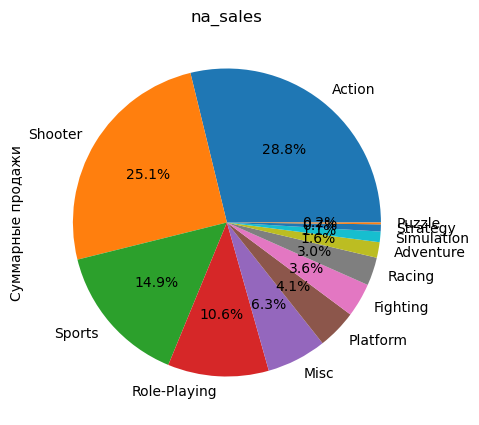

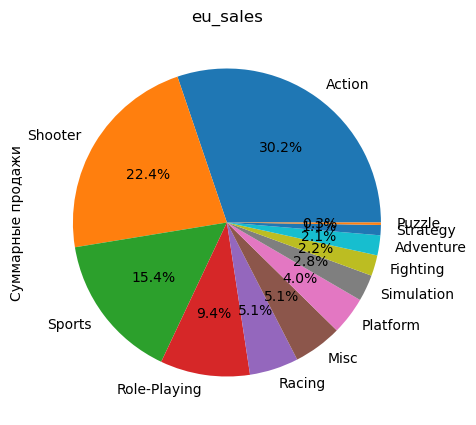

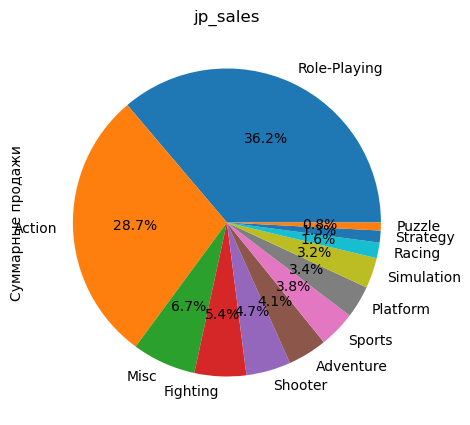

In [108]:
for region in spisok_regions:
    (data_regions_genre.sort_values(by=region,ascending=False)
     .plot(kind='pie', y=region, legend=False, figsize=(5, 5), title = region, autopct='%1.1f%%')
     .set(ylabel='Суммарные продажи')
    )
    plt.show()
    

***Вывод:***

В Северной Америке и Европе наиболее популярны игры в жанре экшн, шутер. В Японии наиболее популярны ролевые игры и игры в жанре экшн. Разница в жанровых предпочтениях пользователей в отношении компьютерных игр скорее всего объясняется культурными различиями.

***Самые популярные жанры игр (топ-5) в Северной Америке за период 2013-2016 гг.:***

 - жанр "экшн"(action) - доля продаж составила 28.8%;
 - жанр "шутер" (shooter) - доля продаж составила 25.1%;
 - спортивные игры (sports) - доля продаж составила 14.9%;
 - ролевые игры (role-playing) - доля продаж составила 10.6%;
 - жанр "misc" - доля продаж составила 6.3%.
 
***Самые популярные жанры игр (топ-5) в Европе за период 2013-2016 гг.:***

 - жанр "экшн"(action) - доля продаж составила 30.2%;
 - жанр "шутер" (shooter) - доля продаж составила 22.4%;
 - спортивные игры (sports) - доля продаж составила 15.4%;
 - ролевые игры (role-playing) - доля продаж составила 9.4%;
 - гоночные игры (racing) - доля продаж составила 5.1%.

 
***Самые популярные жанры игр (топ-5) в Японии за период 2013-2016 гг.:***

 - ролевые игры (role-playing) - доля продаж составила 36.2%;; 
 - жанр "экшн"(action) - доля продаж составила 28.7%;
 - жанр "misc" - доля продаж составила 6.7%;
 - игра в стиле боя (fighting) -  доля продаж составила 5.4%;
 - жанр "шутер" (shooter) - доля продаж составила 4.7%.

### Определение влияния рейтинга ESRB на продажи в регионе:

In [95]:
# построим сводную таблицу по суммарным продажам игр по рейтингу игр для каждого региона:
data_regions_ratio = actual_data.pivot_table(index='rating', 
                                           values=['na_sales', 'eu_sales', 'jp_sales'], 
                                           aggfunc='sum')
data_regions_ratio

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.80,14.11,165.29
ND,78.91,85.29,89.42
T,41.95,20.59,49.79


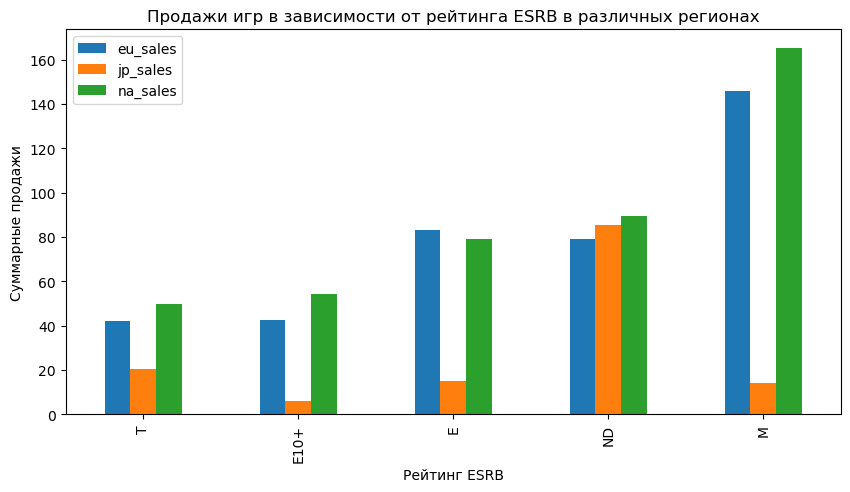

In [96]:
# построим столбчатую диаграмму по продажам игр в зависимости от рейтинга:
data_regions_ratio.sort_values(by='na_sales').plot(kind='bar', figsize=(10, 5))
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')
plt.title('Продажи игр в зависимости от рейтинга ESRB в различных регионах')
plt.show()

***Вывод:***

В Северной Америке и Европе больше всего продаются игры с рейтингом "для взрослых (не младше 17 лет)". 
Следом идут игры для всех (подходят для всех возрастов) - игры, которые имеют самую широкую аудиторию, могут быть интересны как детям, так и взрослым, далее игры для детей от 10 лет и старше.

Следует отметить, что рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). 

Из диаграммы видим, что в Японии популярны игры, неимеющие маркировки этого рейтинга - скорее всего это игры, созданные в Японии и не получавшие рейтинга, но популярные в стране.

## Проверка гипотез: <a id="research8"></a>  </div>

### Первая проверка: средние пользовательские рейтинги платформ XboxOne и PC одинаковые. <a id="research9"></a>  </div>

Для сравнения пользовательских рейтингов двух платформ предположим следующее: пользователи прежде всего оценивают саму игру, одни и те же игры на различных платформах скорее всего будут оценены одинаково.Различия в пользовательских рейтингах платформы более связаны с различием в рейтингах конкретных игр.

In [97]:
# проверим наличие nan в оценках пользователей:
data['user_score'].isna().sum()

9027

In [98]:
# удалим пропущенные значения:
data = data.dropna(subset=['user_score'])

In [99]:
data['user_score'].isna().sum()

0

Сформулируем гипотезы:

H0 (нулевая гипотеза): Средние пользовательские рейтинги платформ XboxOne и PC не отличаются (т.е. одинаковые).

H1 (альтернативная гипотеза): Средние пользовательские рейтинги платформ XboxOne и PC различаются.

Для проверки гипотезы установим уровень статистической значимости 5% (alpha = 0.05).

Для проверки гипотезы применим метод scipy.stats.ttest_ind.

Определим актуальный период. Прогноз строится на 2017 г., поэтому для прогноза достаточно взять предыдущие 2 года. Но меня смущает тот факт, что за 2016 г. у нас неполные данные, поэтому предполагаю, что правильнее будет взять для анализа два полноценных периода и один неполный период, т.е. за актуальный период возьмем 3 года - 2014, 2015, 2016 (не полные данные).    

In [100]:
# сделаем срез по пользовательским рейтингам платформы XboxOne за актуальный период: 
xone = data.query('platform == "XOne" and year_of_release >= 2014')['user_score'] 
                                   
# сделаем срез по пользовательским рейтингам платформы PC за актуальный период: 
pc = data.query('platform == "PC" and year_of_release >= 2014')['user_score'] 

# определим дисперсии двух выборок
var_xone = np.var(xone)
var_pc= np.var(pc)

print("Дисперсия выборки XOne:", var_xone)
print("Дисперсия выборки PC:", var_pc)     

Дисперсия выборки XOne: 1.87954600550964
Дисперсия выборки PC: 2.8930689404455023


In [101]:
# применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется ниже его - отвергаем гипотезу

results = st.ttest_ind(xone, pc, equal_var= False)  # так как дисперсии генеральных совокупностей не равны
   
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.139237120435483
Не получилось отвергнуть нулевую гипотезу


***Вывод:***

Полученное значение p-value говорит о том, что с вероятностью 13.9% можно получить случайно такое или большое различие в средних пользовательских рейтингах платформ XboxOne и PC. Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ XboxOne и PC не отличаются, т.е. являются одинаковыми. 

In [102]:
# теперь посмотрим средние пользовательские рейтинги платформ по актуальному периоду:

data_actual = data.query('year_of_release >= 2014') 

data_actual.query('platform in ["XOne", "PC"]').pivot_table(index='platform', 
                                                     values='user_score', aggfunc=['count', 'mean', 'median', 'var'])

# в данном случае средние пользовательские рейтинги платформ больше разнятся, причем рейтинг платформы XOne ниже

,count,mean,median,var
,user_score,user_score,user_score,user_score
platform,,,,
PC,123,6.32,6.80,2.92
XOne,165,6.59,6.80,1.89


Средние пользовательские рейтинги платформ XboxOne и PC близки по значению. 

### Вторая проверка: средние пользовательские рейтинги жанров Action и Sports разные.<a id="research10"></a>  </div>

Для сравнения пользовательских рейтингов жанров игр предположим следующее: рейтинг игры во многом зависит от индивидуальных предпочтений пользователя в том или ином жанре, жанры Action и Sports будут скорее похожи, чем различны.


Сформулируем гипотезы:

H0 (нулевая гипотеза): Средние пользовательские рейтинги жанров Action и Sports равны (т.е. не отличаются).

H1 (альтернативная гипотеза): Средние пользовательские рейтинги жанров Action и Sports различаются.

Для проверки гипотезы установим уровень статистической значимости 5% (alpha = 0.05).

In [103]:
# проверим наличие nan в жанрах игр:
data['genre'].isna().sum()

0

In [104]:
# сделаем срез по пользовательским рейтингам жанра Action по актуальному периоду: 
g_action = data.query('genre == "Action" and year_of_release >= 2014')['user_score'] 
                                   
# сделаем срез по пользовательским рейтингам жанра Sports: 
g_sports = data.query('genre == "Sports" and year_of_release >= 2014')['user_score'] 

# определим дисперсии двух выборок
var_action = np.var(g_action)
var_sports = np.var(g_sports)

print("Дисперсия выборки жанра Action:", var_action)
print("Дисперсия выборки жанра Sports:", var_sports)     

Дисперсия выборки жанра Action: 1.8958537903698014
Дисперсия выборки жанра Sports: 3.419837559675118


In [105]:
# применим метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:

alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется ниже его - отвергаем гипотезу

results = st.ttest_ind(g_action, g_sports, equal_var= False)  # так как дисперсии не равны
   
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


***Вывод:***

Полученное значение p-value оказалось ниже критического уровня статистической значимости, поэтому нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны, отвергается.

In [106]:
# посмотрим средние пользовательские рейтинги жанров по актуальному периоду:

data_actual.query('genre in ["Action", "Sports"]').pivot_table(index='genre', 
                                                     values='user_score', aggfunc=['count', 'mean', 'median', 'var'])

,count,mean,median,var
,user_score,user_score,user_score,user_score
genre,,,,
Action,298,6.77,7.10,1.90
Sports,127,5.23,5.50,3.45


Средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общие выводы: <a id="research12"></a>  </div>

**В рамках исследования о продаже компьютерных игр проведены следующие этапы:**

**На этапе предобработки данных:**
  - изучен датасет
  - произведены замена названий столбцов таблицы, преобразование данных в нужные типы;
  - обработаны пропущенные значения (при возможности корректного заполнения), в т.ч. удалены строки с пропущенными значения;
  - проверены уникальные значения по столбцам и проведена корректировка данных;
  - в датасет добавлены новые столбцы в соответствии с описанием проектной работы, а также другие столбцы для дальнейшего анализа.  

**На этапе исследовательского анализа данных проведено следующее:**

  - анализ динамики выпуска игр по годам;
  - анализ динамика продаж по платформам; 
  - анализ самых продаваемых игр как актуального периода, так и по данным всего датасета;
  - анализ игр по жанрам. 
  
***Установлено следующее:***
  
   - В датасете представлены данные за 1980 - 2016 гг. В период с 1980 по 1995 годы наблюдается неравномерный график продаж компьютерных игр, объемы продаж не превышают 100 млн.копий. С 1996 года наблюдается постепенный рост продаж (объемы продаж достигают отметки в 200 млн.копий), далее наблюдается некоторый упадок в 2000 году, далее - рост продаж с пиком в 2008 году. Примерно с 2008 года, когда было продано максимальное количество копий (680 млн.), наблюдается уже спад продаж компьютерных игр. Такой рост продаж связан с быстрым появлением и распространением персональных компьютеров и игровых консолей. 

   - С 2010 года наблюдается спад (по количеству как выпущенных игр, так и по объемам продаж). Это можно связать с тем, что в нашем датасете отсутствуют данные по самому популярному сейчас сегменту игровой индустрии - мобильные игры. Повсеместное развитие интернета, распространение смартфонов и других гаджетов, популяризация жанра MMORPG, популяризация киберспорта и др. - привело к развитию мобильного гейминга, к росту интереса потребителей к играм на мобильных платформах. В нашем датасете информация об этом новом быстроразвивающимся сегменте рынка компьютерных игр отсутствует.
   
   - Определены платформы с наибольшими суммарными продажами за весь анализируемый период датасета - это платформы PlayStation2 компании SONY, Xbox360 компании Microsoft, PlayStation3 компании SONY, Wii компании Nintendo, DS компании Nintendo, PlayStation компании SONY.
   
   - Установлено, что в среднем срок жизнеспособности платформы составляет 10-12 лет. Пик продаж приходится в среднем через 4-5 лет, т.е. в самой середине срока; определен актуальный срок для дальнейшего анализа данных - период с 2013 г. по 2016 г.
   
   - В актуальном периоде наблюдался рост продаж только у двух платформ: PlayStation4 компании SONY и XboxOne компании Microsoft; по остальным платформам наблюдался спад продаж. Потенциально прибыльные платформы: PlayStation4 компании SONY, XboxOne компании Microsoft, Xbox360 компании Microsoft, Wii и WiiU компании Nintendo.
   
   - В рамках изучения влияния на продажи игр оценок критиков и пользователей установлено, что с ростом оценки критиков частично наблюдается рост продаж игр, но связь эта слабая. Оценки пользователей игр не коррелирует напрямую с продажами игр, возможно на связь между этими параметрами оказывает влияние другой фактор (например, значимость оценки игры при выборе игры для определенного круга пользователей).
   
   - Определены самые продаваемые и прибыльные жанры компьютерных игр - игры жанра shooter (стрелялки), sports (спортивные игры), platform (передвижение по платформам), ролевые игры, fighting (в стиле боя). Больше всего пользователи покупают игры в жанре Action (доминирующее место по количеству проданных игр), ролевые игры, приключенческие игры, спортивные игры, а меньше всего игры в жанре puzzle, strategy.   

***Проанализирован также портрет пользователя компьютерных игр для каждого региона:***

В Северной Америке и в Европе почти одинаковые предпочтения по платформам для игр: 
- в обоих регионах по объемам продаж лидирует PlayStation4 компании SONY (причем в Европе объем продаж данной платформы выше почти в 1.5 раза, чем в Северной Америке);
- в обоих регионах в топе числятся платформы PlayStation4, PlayStation3 компании SONY; платформы XboxOne, Xbox360 компании Microsoft (причем в Северной Америке продажи платформ компании Microsoft выше, чем в Европе).

В Японии наблюдаются иные предпочтения пользователей по платформам для игр:
- лидером продаж в регионе выступает портативная игровая консоль 3DS компании Nintendo (почти 50% продаж);
- в этом регионе в топе также числятся платформы PlayStation4, PlayStation3 компании SONY;
- кроме того в топе продаж числится еще одна портативная игровая консоль компании SONY - PlayStation Vita.
- в регионе наблюдаются предпочтения в сторону отечественных производителей.

В Северной Америке и Европе наиболее популярны игры в жанре экшн, шутер. В Японии наиболее популярны ролевые игры и игры в жанре экшн. Разница в жанровых предпочтениях пользователей в отношении компьютерных игр скорее всего объясняется культурными различиями.

В Северной Америке и Европе больше всего продаются игры с рейтингом "для взрослых (не младше 17 лет)". 
Следом идут игры для всех (подходят для всех возрастов) - игры, которые имеют самую широкую аудиторию, могут быть интересны как детям, так и взрослым, далее игры для детей от 10 лет и старше. Следует отметить, что рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). В Японии популярны игры, неимеющие маркировки этого рейтинга - скорее всего это игры, созданные в Японии и не получавшие рейтинга, но популярные в стране.


***Проведена проверка гипотез:***

   Если сравнивать пользовательские рейтинги различных платформ следует отметить, что пользователи прежде всего оценивают саму игру, одни и те же игры на различных платформах скорее всего будут оценены одинаково.Различия в пользовательских рейтингах платформы более связаны с различием в рейтингах конкретных игр.

   По итогам проверки гипотезы - средние пользовательские рейтинги платформ XboxOne и PC не отличаются.

   Если же сравнивать пользовательские рейтинги различных жанров игр, то здесь различия в пользовательских рейтингах будут более выраженными, т.к. пользователи оценивая саму игру, отталкиваются от своих индивидуальных предпочтений. 

   По итогам проверки гипотезы - средние пользовательские рейтинги жанров Action и Sports отличаются.

В итоге отметим, что на успешность игры более всего будет влиять то, насколько эта игра соответствует индивидуальным предпочтениям пользователей, насколько игра доступна и реализуема на различных платформах, насколько поддержка игры разработчиками будет соответствовать быстроменяющимся условиям современного мира и появляющимся новым запросам со стороны общественности - например, спрос на социализацию игры (когда участники играют и одновременно общаются), интерес к стримингу (онлайн-трансляции процесса прохождения игры), интерес к киберспорту, развитию различных форм монетизации компьютерной игры и т.п.   

Предлагаемая рекламная кампания на 2017-й год:

В целях привлечения клиентов- пользователей компьютерных игр регионов Северной Америки или Европы предложить рекламировать продажи игр на новых растущих по объему продаж платформах PlayStation4 или XboxOne; для пользователей региона Японии - рекламировать продажи игр на новой платформе WiiU или на новой платформе PlayStation4.

Для пользователей компьютерных игр в Северной Америке и Европе - рекламировать игры в жанре Shooter или Sports с рейтингом "Для взрослых"; для пользователей в Японии - в жанре Role-Playing и shooter с рейтингом "для всех".

При проведении рекламной кампании игр следует обращать внимание на высокие оценки критиков (при их наличии); для пользователей в Японии - также следует обращать внимание на высокие оценки пользователей (при их наличии).